In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.src.utils.module_utils import tensorflow
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense ,LSTM

In [3]:
data = pd.read_csv('final_dians_data.csv')

In [4]:
data

Код на издавач       Датум Цена на последна трансакција      Мак.  \
0               ADIN  11/13/2014                       305,00    305,00   
1               ADIN   12/2/2014                       450,00    450,00   
2               ADIN   12/4/2014                       409,00    409,00   
3               ADIN   12/5/2014                       410,00    410,00   
4               ADIN  12/22/2014                       357,00    357,00   
...              ...         ...                          ...       ...   
28650           ZPOG  11/20/2024                     3.000,00  3.000,00   
28651           ZUAS  12/19/2014                     2.091,00  2.091,00   
28652           ZUAS   9/30/2015                     2.160,00  2.160,00   
28653           ZUAS  11/19/2015                     2.100,00  2.100,00   
28654           ZUAS   12/7/2015                     2.100,00  2.100,00   

           Мин. Просечна цена  %пром.  Количина Промет во БЕСТ во денари  \
0        305,00        305,00   22,00     581.0               177.205,00   
1        450,00        450,00   47,54     180.0                81.000,00   
2        409,00        409,00   -9,11     100.0                40.900,00   
3        410,00        410,00    0,24     683.0               280.030,00   
4        357,00        357,00  -12,93     100.0                35.700,00   
...         ...           ...     ...       ...                      ...   
28650  3.000,00      3.000,00  -50,41      15.0                45.000,00   
28651  2.091,00      2.091,00   -2,97     144.0               301.104,00   
28652  2.160,00      2.160,00    3,30     381.0               822.960,00   
28653  2.100,00      2.100,00   -2,78     559.0             1.173.900,00   
28654  2.100,00      2.100,00    0,00     495.0             1.039.500,00   

      Вкупен промет во денари  
0                  177.205,00  
1                   81.000,00  
2                   40.900,00  
3                  280.030,00  
4                   35.700,00  
...                       ...  
28650               45.000,00  
28651              301.104,00  
28652              822.960,00  
28653            1.173.900,00  
28654            1.039.500,00  

[28655 rows x 10 columns]

In [5]:
data['Датум'] = pd.to_datetime(data['Датум'], format='%m/%d/%Y')
data['Цена на последна трансакција'] = data['Цена на последна трансакција'].str.replace(',', '').astype(float)
data['Количина'] = data['Количина'].astype(float)


unique_issuers = data['Код на издавач'].unique()
models = {}

for issuer in unique_issuers:
    issuer_data = data[data['Код на издавач'] == issuer].sort_values('Датум')

    prices = issuer_data['Цена на последна трансакција'].values
    volumes = issuer_data['Количина'].values

    train_size = int(len(prices) * 0.7)
    train_prices, test_prices = prices[:train_size], prices[train_size:]
    train_volumes, test_volumes = volumes[:train_size], volumes[train_size:]

    models[issuer] = (train_prices, test_prices, train_volumes, test_volumes)



Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.3186 - val_loss: 0.3044
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0833 - val_loss: 0.3089
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0320 - val_loss: 0.3426
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0377 - val_loss: 0.2659
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0230 - val_loss: 0.2496
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0281 - val_loss: 0.2541
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0191 - val_loss: 0.2664
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0223 - val_loss: 0.2575
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0178 - val_loss: 0.2369
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0191 - val_loss: 0.2374
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0174 - val_loss: 0.2487
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - val_loss: 0.2429


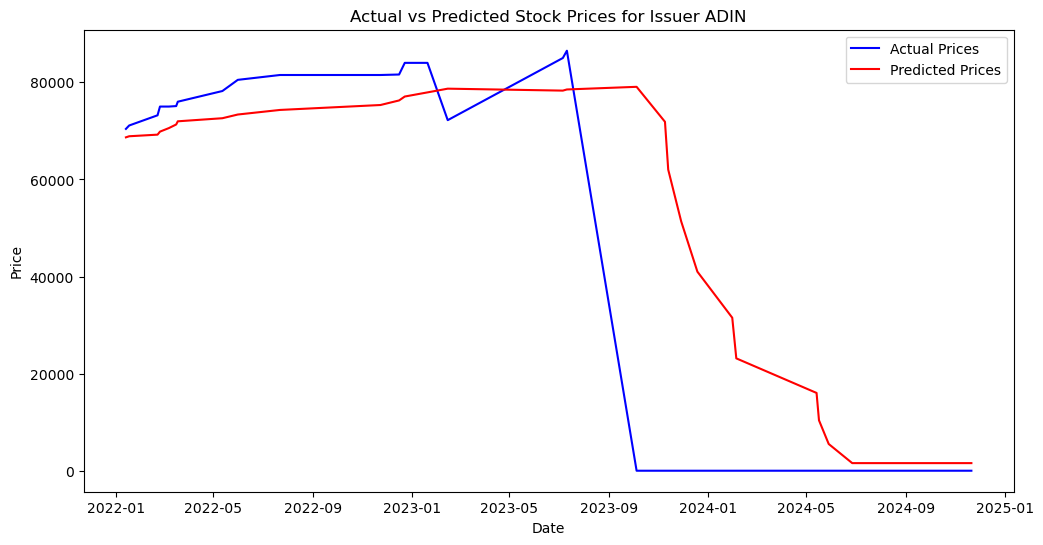

Mean Squared Error for Issuer ADIN: 424983596.5348867
Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0519 - val_loss: 8.9855e-04
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 

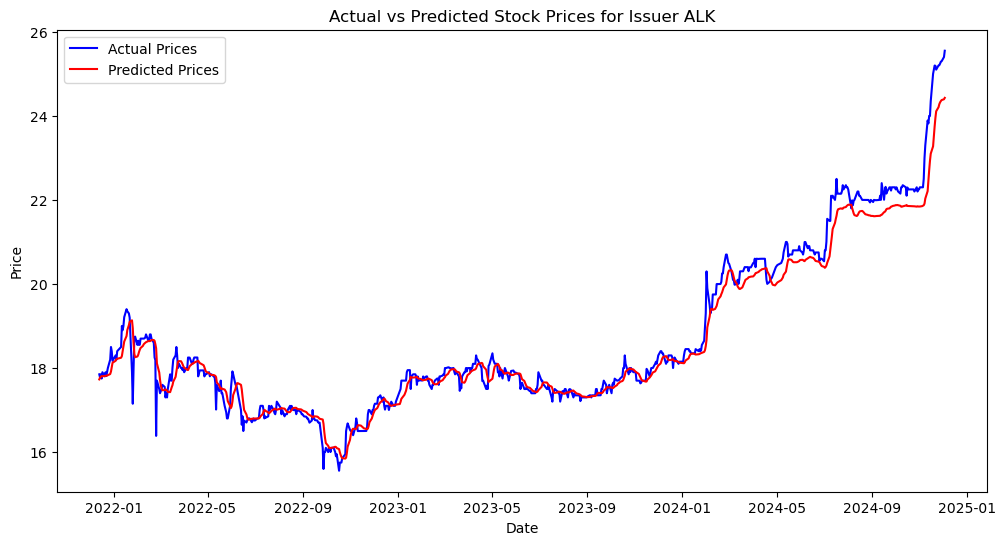

Mean Squared Error for Issuer ALK: 0.13147331652783395
Премалку податоци за издавач ALKB. Намалување на look_back.
Недоволно податоци за X_test за издавач ALKB. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0000e+00 

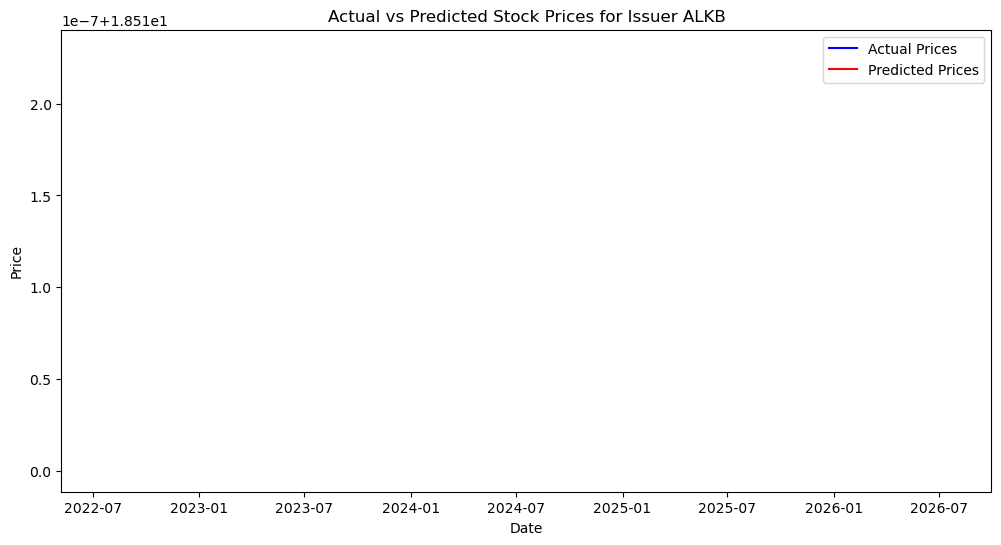

Mean Squared Error for Issuer ALKB: 5.2386894106547235e-14
Недоволно податоци за издавач AMEH, прескокнување на обработката.
Недоволно податоци за издавач APTK, прескокнување на обработката.
Премалку податоци за издавач ATPP. Намалување на look_back.
Недоволно податоци за X_test за издавач ATPP. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.0278 - val_loss: 4.0112
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.9868 - val_loss: 3.8560
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.9451 - val_loss: 3.6994
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.8972 - val_loss: 3.5460
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.8682 - val_loss: 3.3936
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.7810 - val_loss: 3.2382
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.7659 - val_loss: 3.0825
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.7261 - val_loss: 2.926

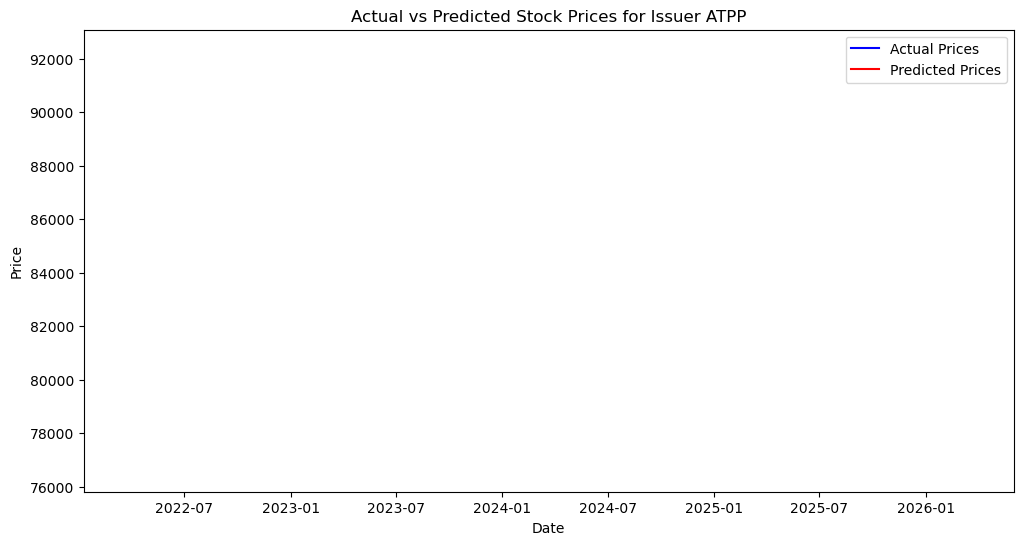

Mean Squared Error for Issuer ATPP: 246404393.37164307
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - loss: 0.3896 - val_loss: 1.4716
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2741 - val_loss: 0.9676
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1591 - val_loss: 0.4938
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0746 - val_loss: 0.1139
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0219 - val_loss: 0.0174
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0581 - val_loss: 0.0323
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0488 - val_loss: 0.0097
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0245 - val_loss: 0.0546
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0269 - val_loss: 0.1180
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0265 - val_loss: 0.1487
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0290 - val_loss: 0.1354
Epoch 12/50
3/3 ━━━━━━━━━━━━━

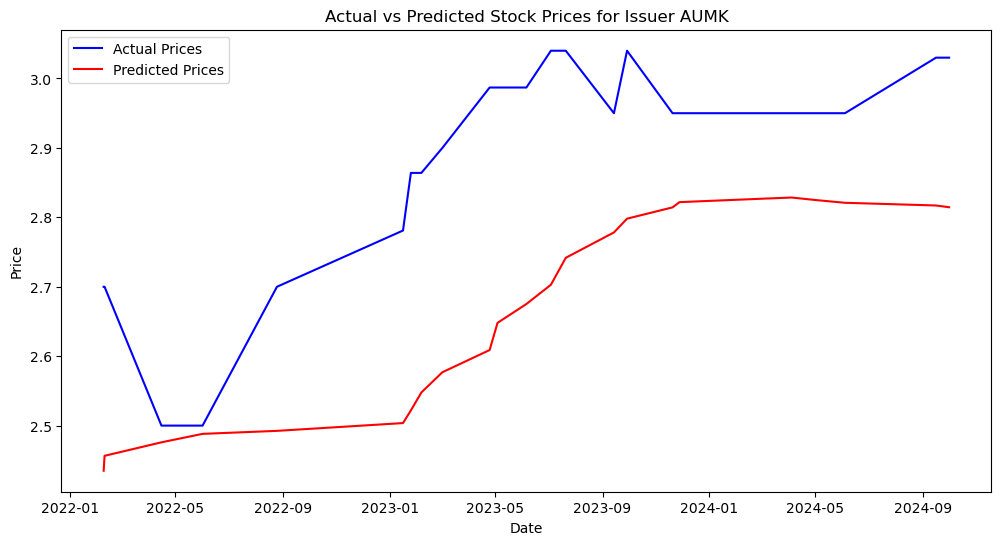

Mean Squared Error for Issuer AUMK: 0.05859403150511135
Недоволно податоци за X_test за издавач BANA. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.5653 - val_loss: 0.5192
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.4808 - val_loss: 0.4897
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.5103 - val_loss: 0.4611
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.4639 - val_loss: 0.4327
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.4112 - val_loss: 0.4044
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.3793 - val_loss: 0.3760
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.3379 - val_loss: 0.3473
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3118 - val_loss: 0.3183
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.3518 - val_loss: 0.2895
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.2360 - val_loss: 0.2605
Epoch 11/50
1/1 ━━━━━━━━━━

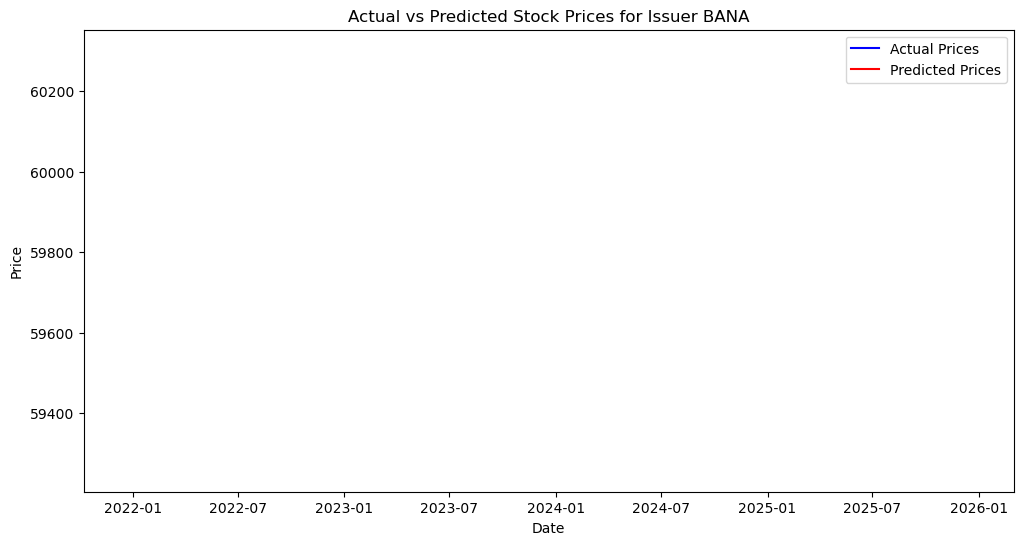

Mean Squared Error for Issuer BANA: 1087954.9322662354
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0393 - val_loss: 4.8787e-04
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0277 - val_loss: 6.8522e-05
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0111 - val_loss: 2.8694e-05
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0056 - val_loss: 3.4033e-04
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0042 - val_loss: 8.5814e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0090 - val_loss: 0.0015
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0104 - val_loss: 0.0013
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0085 - val_loss: 9.4675e-04
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0094 - val_loss: 5.8248e-04
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0064 - val_loss: 2.7782e-04

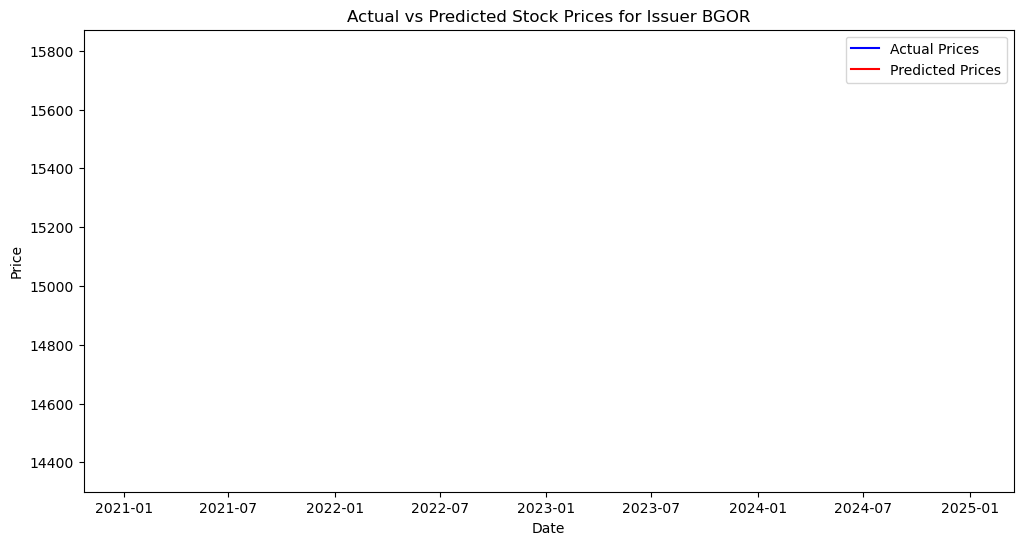

Mean Squared Error for Issuer BGOR: 2040584.3497047424
Недоволно податоци за издавач BIKF, прескокнување на обработката.
Недоволно податоци за издавач BIM, прескокнување на обработката.
Недоволно податоци за издавач CDHV, прескокнување на обработката.
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.2596 - val_loss: 0.0850
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1250 - val_loss: 0.0564
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1154 - val_loss: 0.0481
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0995 - val_loss: 0.0575
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0961 - val_loss: 0.0488
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1031 - val_loss: 0.0433
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0941 - val_loss: 0.0422
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0903 - val_loss: 0.0426
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0865 - val_loss: 0.0438


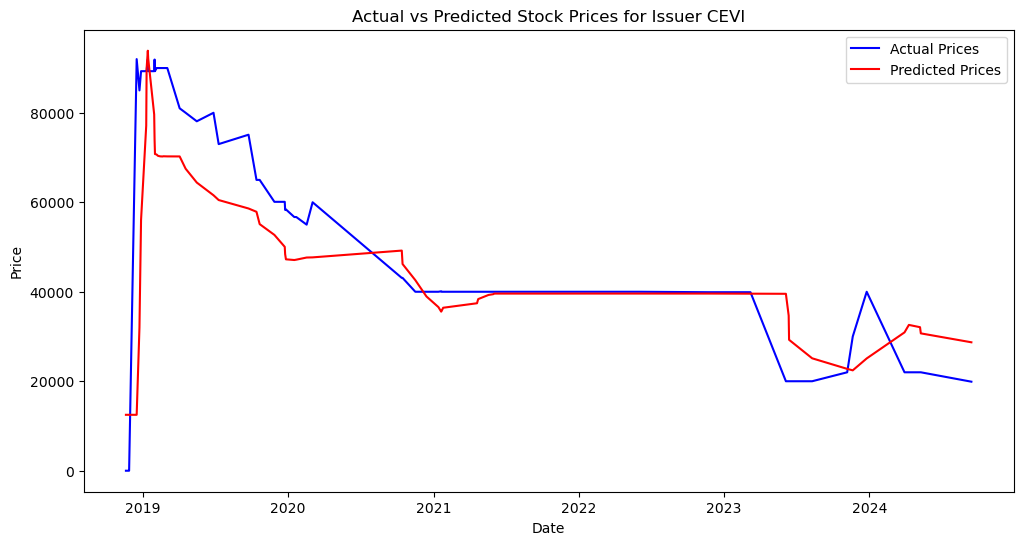

Mean Squared Error for Issuer CEVI: 252243276.96698323
Недоволно податоци за X_test за издавач CKB. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.8657 - val_loss: 0.0447
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.7531 - val_loss: 0.0535
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.6626 - val_loss: 0.0632
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.5481 - val_loss: 0.0739
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.5175 - val_loss: 0.0858
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.4027 - val_loss: 0.0989
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.3150 - val_loss: 0.1134
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.3092 - val_loss: 0.1295
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1563 - val_loss: 0.1471
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1463 - val_loss: 0.1669
Epoch 11/50
1/1 ━━━━━━━━━━

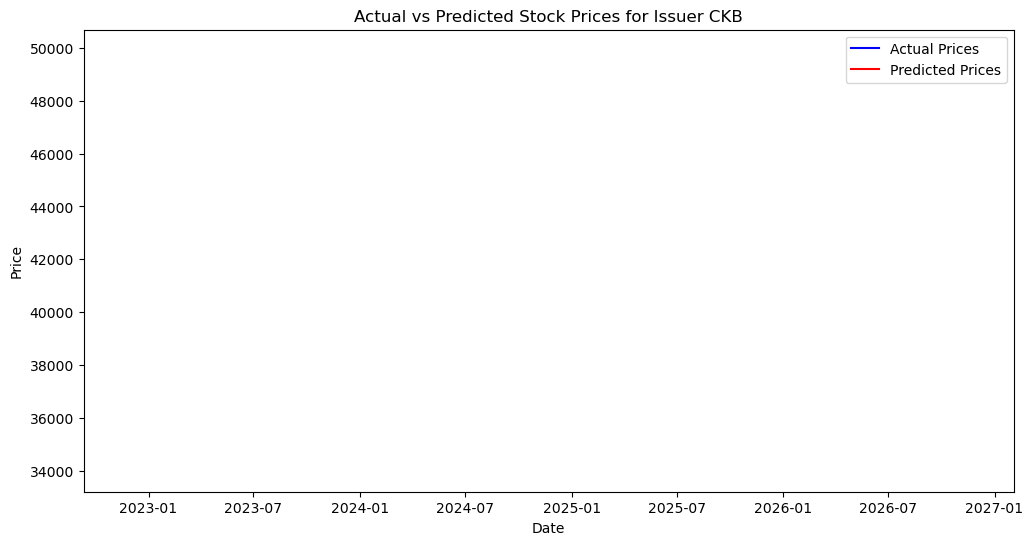

Mean Squared Error for Issuer CKB: 252599244.72364807
Недоволно податоци за издавач CKBKO, прескокнување на обработката.
Недоволно податоци за издавач DEBA, прескокнување на обработката.
Недоволно податоци за издавач DIMI, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
1/1 ━

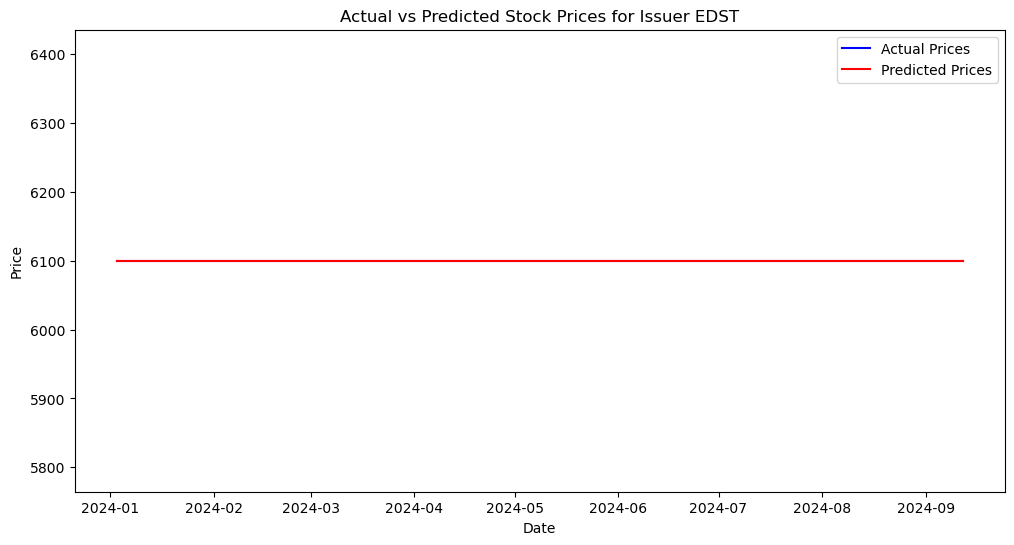

Mean Squared Error for Issuer EDST: 0.0
Недоволно податоци за издавач ELMA, прескокнување на обработката.
Премалку податоци за издавач ENER. Намалување на look_back.
Недоволно податоци за X_test за издавач ENER. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
1/1 ━

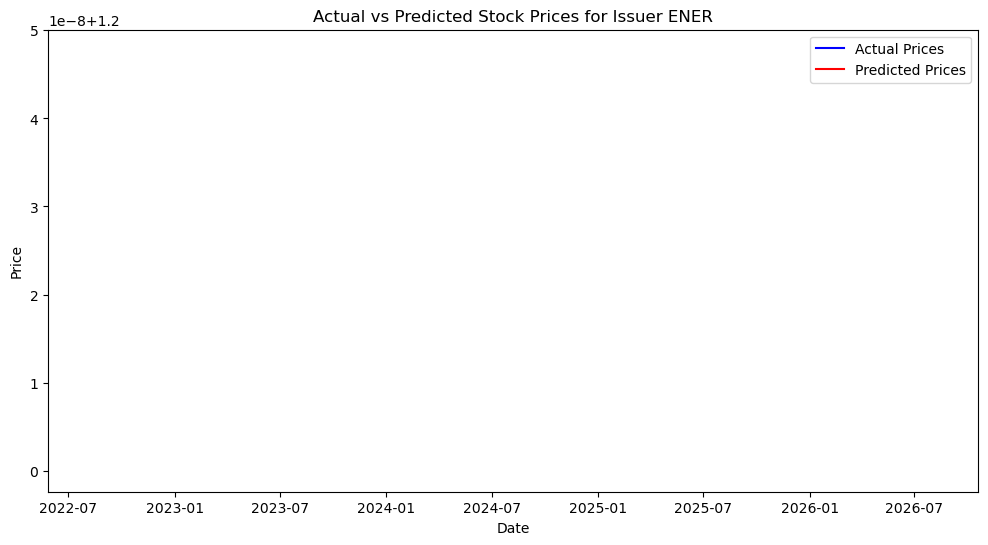

Mean Squared Error for Issuer ENER: 2.2737367586674853e-15
Недоволно податоци за издавач EUHA, прескокнување на обработката.
Недоволно податоци за издавач EUMK, прескокнување на обработката.
Недоволно податоци за X_test за издавач EVRO. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4704 - val_loss: 0.6820
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.4384 - val_loss: 0.6327
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3933 - val_loss: 0.5855
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3612 - val_loss: 0.5398
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.3105 - val_loss: 0.4954
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.2786 - val_loss: 0.4516
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2415 - val_loss: 0.4081
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.2140 - val_loss: 0.3645
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.18

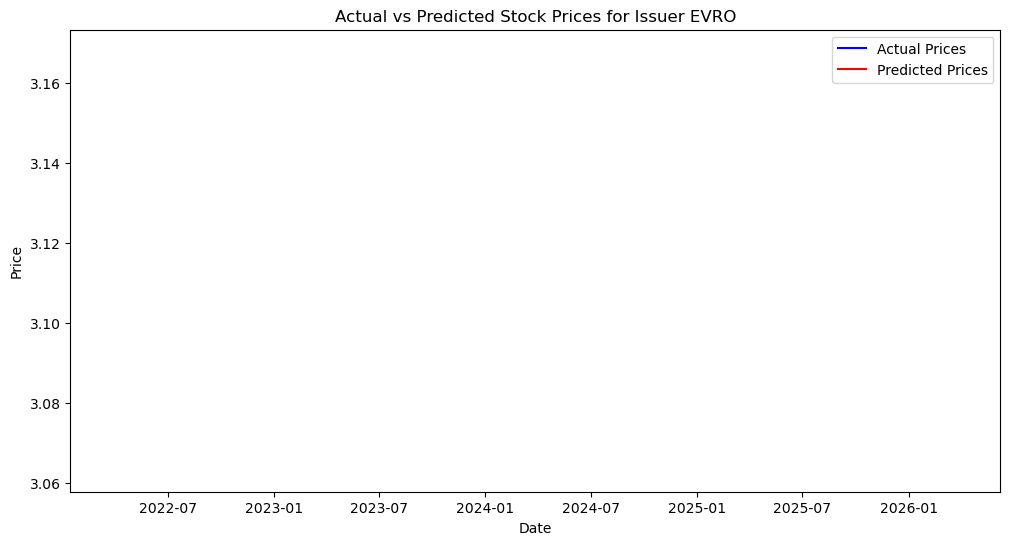

Mean Squared Error for Issuer EVRO: 0.011007991088998423
Недоволно податоци за X_test за издавач FAKM. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0670 - val_loss: 0.3929
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0488 - val_loss: 0.3733
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0320 - val_loss: 0.3540
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0176 - val_loss: 0.3351
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0156 - val_loss: 0.3171
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0135 - val_loss: 0.3004
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0061 - val_loss: 0.2851
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0080 - val_loss: 0.2725
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0097 - val_loss: 0.2638
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0123 - val_loss: 0.2599
Epoch 11/50
1/1 ━━━━━━━━━━

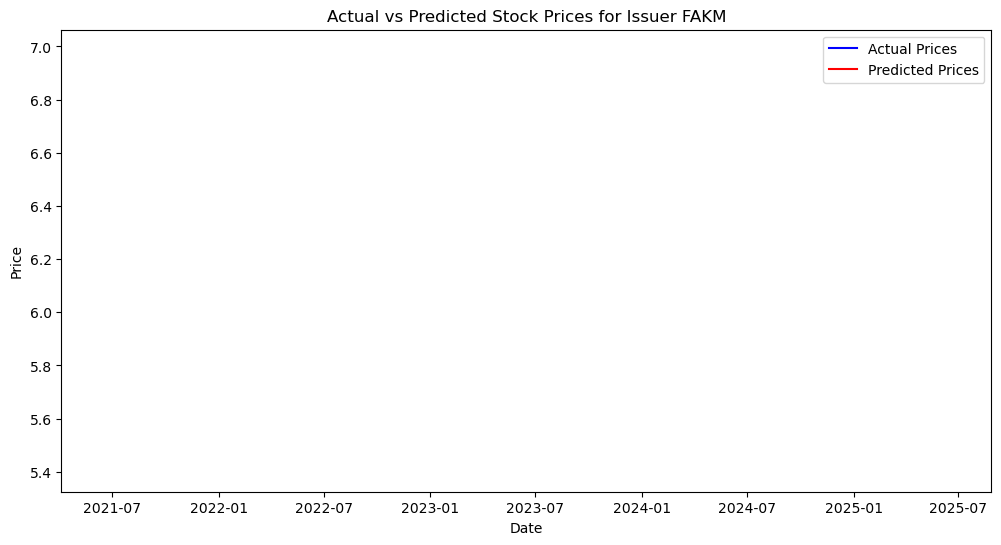

Mean Squared Error for Issuer FAKM: 2.496118850079461
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.2998 - val_loss: 0.0490
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0498 - val_loss: 0.0665
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0455 - val_loss: 0.0077
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0164 - val_loss: 0.0098
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - val_loss: 0.0126
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0125 - val_loss: 0.0144
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - val_loss: 0.0073
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - val_loss: 0.0123
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - val_loss: 0.0071
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - val_loss: 0.0072
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - val_loss: 0.0117
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━

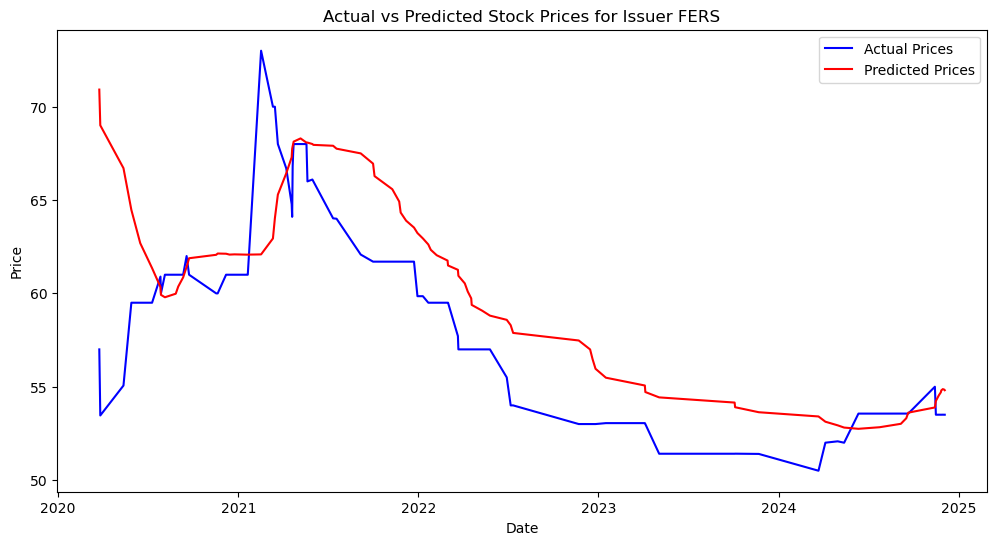

Mean Squared Error for Issuer FERS: 14.247759335447201
Недоволно податоци за издавач FROT, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0801 - val_loss: 1.3210e-04
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0777 - val_loss: 5.1706e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0764 - val_loss: 0.0012
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0763 - val_loss: 0.0021
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0734 - val_loss: 0.0035
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0714 - val_loss: 0.0054
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0703 - val_loss: 0.0079
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0683 - val_loss: 0.0111
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0689 - val_loss: 0.0151
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0672 - val_loss: 0.0198
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━

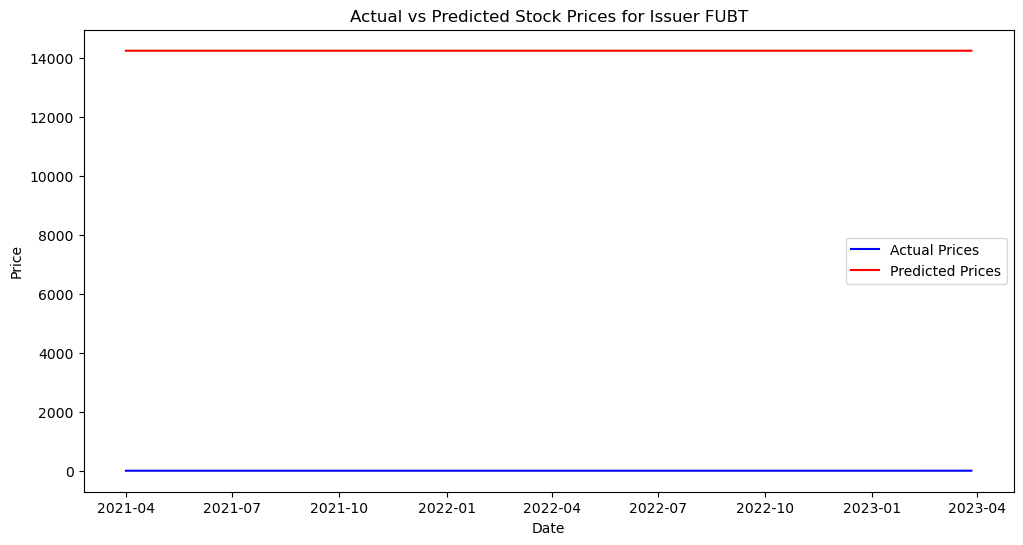

Mean Squared Error for Issuer FUBT: 203292993.86454025
Недоволно податоци за издавач GALE, прескокнување на обработката.
Недоволно податоци за издавач GDKM, прескокнување на обработката.
Недоволно податоци за издавач GECK, прескокнување на обработката.
Недоволно податоци за издавач GECT, прескокнување на обработката.
Недоволно податоци за X_test за издавач GIMS. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.9791 - val_loss: 0.9377
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.8450 - val_loss: 0.8737
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.7310 - val_loss: 0.8105
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.8224 - val_loss: 0.7505
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.6805 - val_loss: 0.6910
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.7094 - val_loss: 0.6328
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.6501 - val_loss: 0.5754
Epoch 8/50
1/1 ━

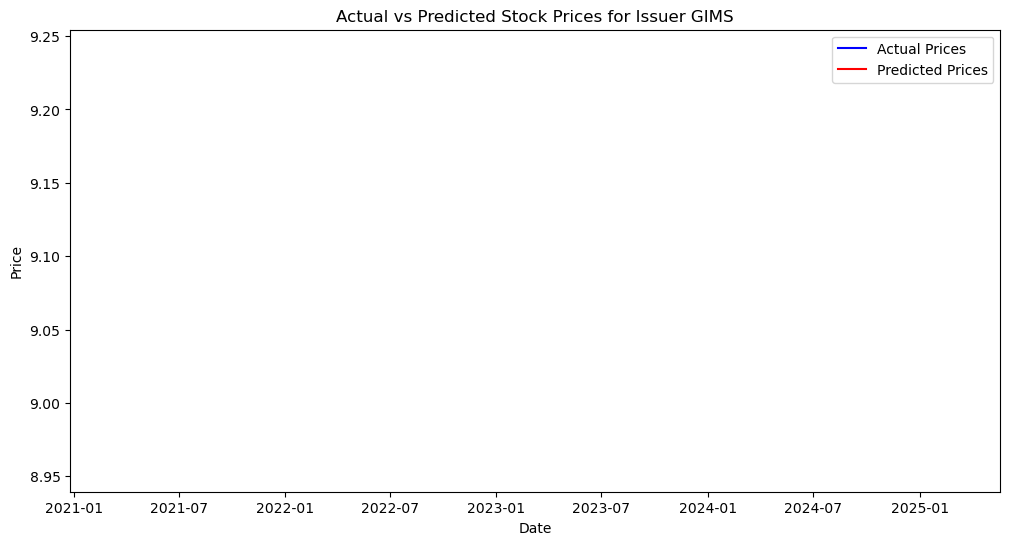

Mean Squared Error for Issuer GIMS: 0.08192451827698982
Недоволно податоци за издавач GRDN, прескокнување на обработката.
Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1020 - val_loss: 0.0076
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0218 - val_loss: 0.0014
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208 - val_loss: 9.2029e-04
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0207 - val_loss: 0.0013
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0197 - val_loss: 7.4551e-04
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180 - val_loss: 0.0015
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0170 - val_loss: 4.9315e-04
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0163 - val_loss: 0.0013
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0166 - val_loss: 6.3127e-04
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0171 - val_loss: 3.4834e-04
Epoch 1

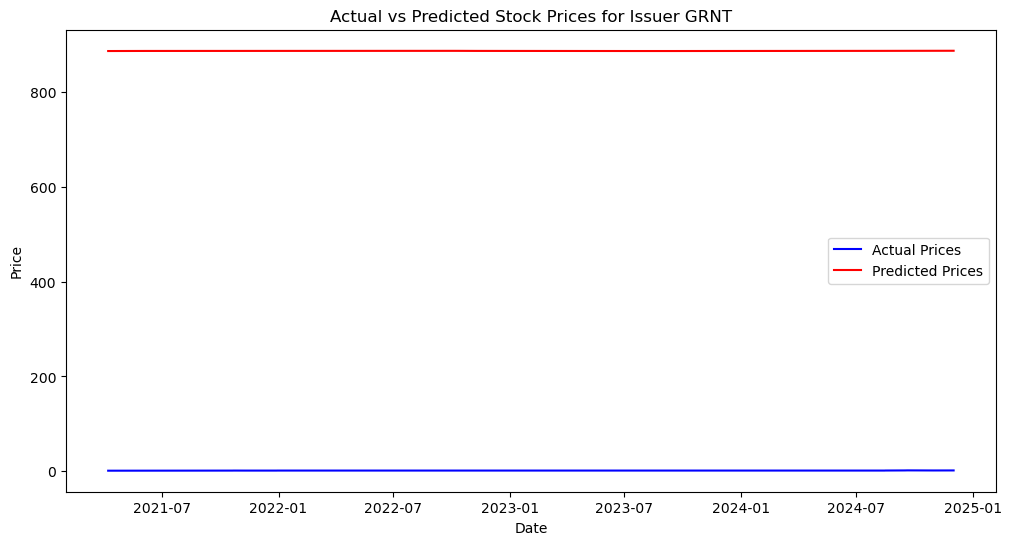

Mean Squared Error for Issuer GRNT: 783803.448598555
Недоволно податоци за издавач GRSN, прескокнување на обработката.
Недоволно податоци за издавач GRZD, прескокнување на обработката.
Недоволно податоци за издавач GTC, прескокнување на обработката.
Недоволно податоци за X_test за издавач GTRG. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━

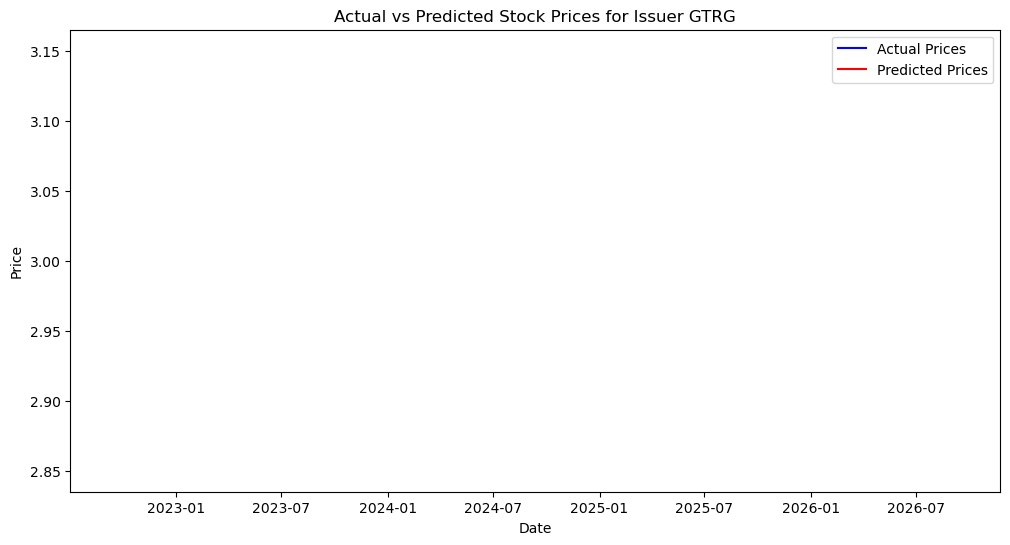

Mean Squared Error for Issuer GTRG: 0.0
Недоволно податоци за издавач IJUG, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1953 - val_loss: 0.2179
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1651 - val_loss: 0.1751
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1369 - val_loss: 0.1354
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.1110 - val_loss: 0.0989
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0924 - val_loss: 0.0662
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0775 - val_loss: 0.0381
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0574 - val_loss: 0.0163
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0398 - val_loss: 0.0030
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0377 - val_loss: 5.8174e-04
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0313 - val_loss: 0.0098
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - lo

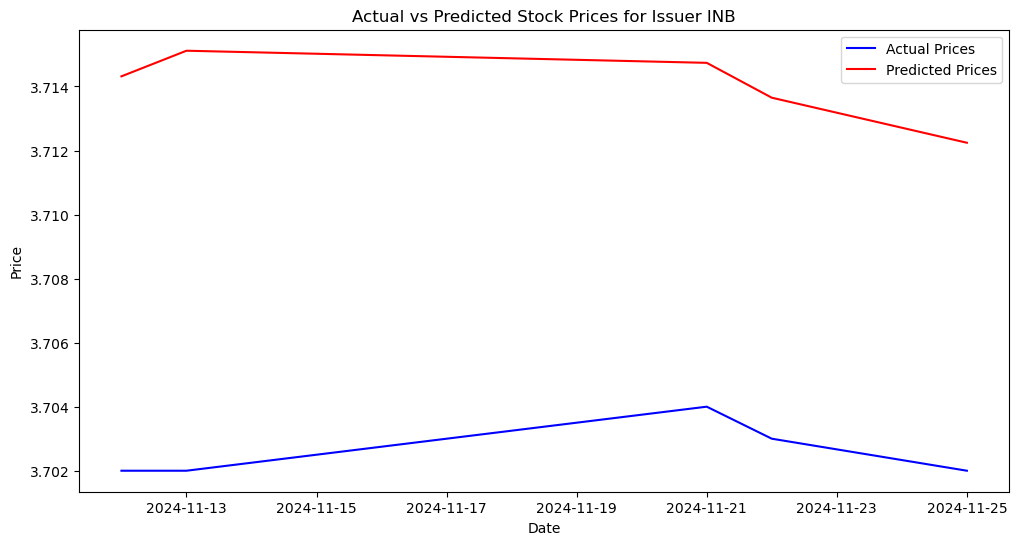

Mean Squared Error for Issuer INB: 0.00013148306453539136
Недоволно податоци за X_test за издавач INPR. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 3.1463e-05 - val_loss: 8.4642e-05
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 3.4539e-04 - val_loss: 9.8029e-06
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 7.9678e-06 - val_loss: 5.8052e-06
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 3.8248e-05 - val_loss: 2.3203e-05
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 3.9814e-05 - val_loss: 2.5666e-05
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 4.3589e-05 - val_loss: 1.4035e-05
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 2.0156e-05 - val_loss: 3.5116e-06
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 2.6036e-05 - val_loss: 1.7133e-09
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 3.3560e-05 - val_loss: 3.9462e-07
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━

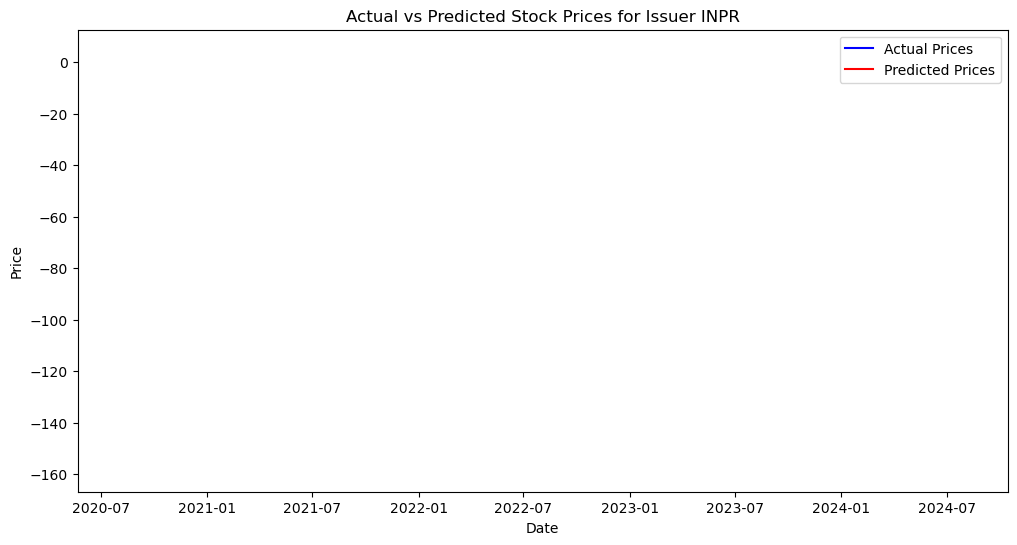

Mean Squared Error for Issuer INPR: 26633.397311353125
Недоволно податоци за издавач JAKO, прескокнување на обработката.
Недоволно податоци за издавач JULI, прескокнување на обработката.
Недоволно податоци за издавач JUSK, прескокнување на обработката.
Недоволно податоци за издавач KARO, прескокнување на обработката.
Недоволно податоци за издавач KDFO, прескокнување на обработката.
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - loss: 0.0188 - val_loss: 9.9583e-05
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0179 - val_loss: 1.9089e-04
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0180 - val_loss: 1.2367e-04
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0098 - val_loss: 2.6945e-05
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0175 - val_loss: 2.6978e-05
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0100 - val_loss: 2.2124e-05
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0172 - val_loss: 6.3568e-05
Epoch

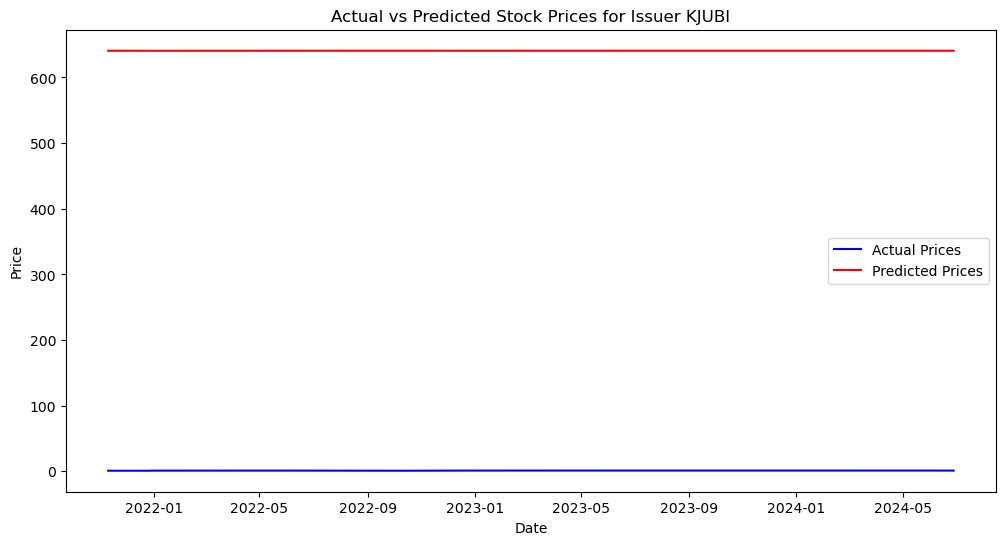

Mean Squared Error for Issuer KJUBI: 408996.698199523
Недоволно податоци за издавач KLST, прескокнување на обработката.
Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0336 - val_loss: 0.0175
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 0.0367
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0523
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0302
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0325
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0248
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 0.0214
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 0.0252
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0310
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 0.0279
Epoch 11/50
53/53 ━━━━━━━━━━━

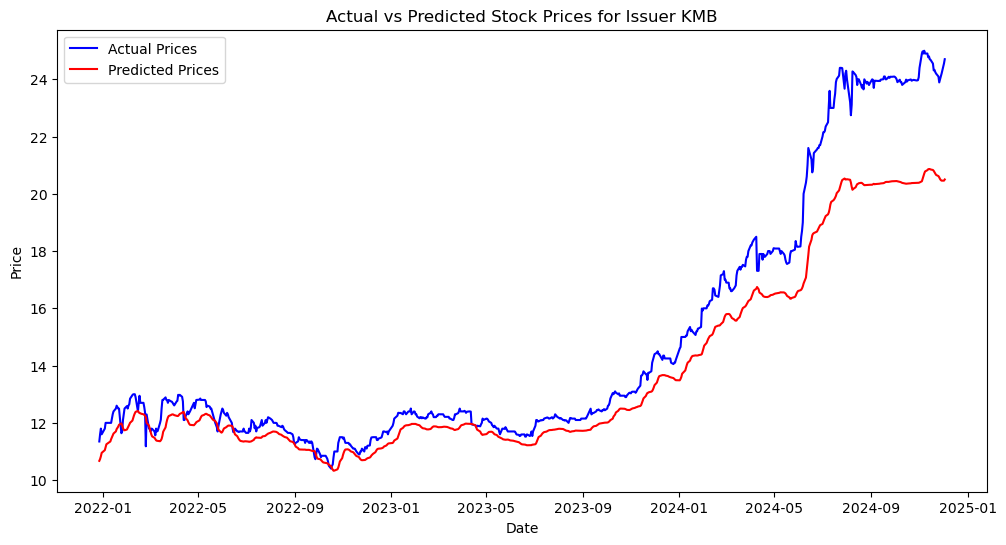

Mean Squared Error for Issuer KMB: 2.611682822777637
Недоволно податоци за издавач KMPR, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0000e+00 - val_loss: 2250661.7500
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/

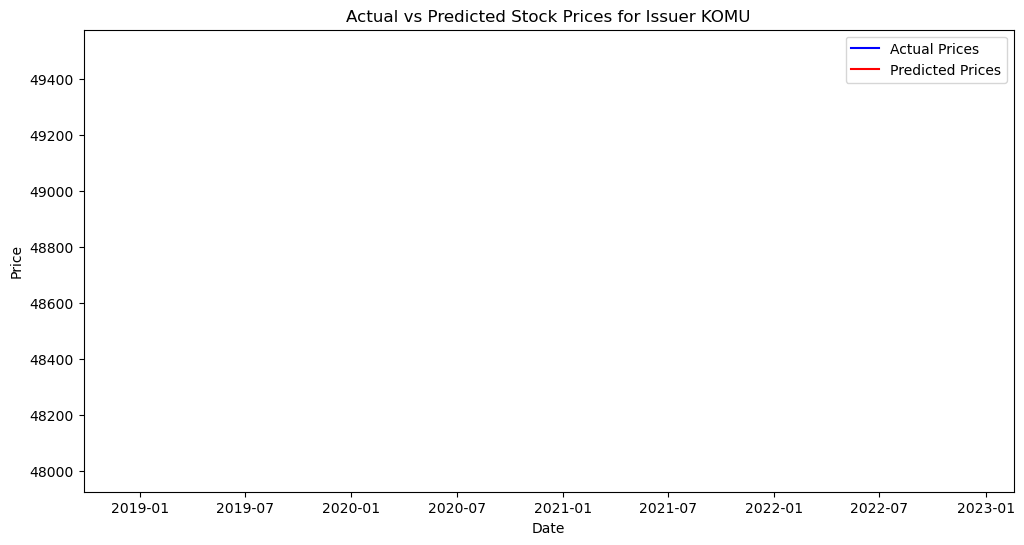

Mean Squared Error for Issuer KOMU: 2250656.2978515625
Недоволно податоци за издавач KONF, прескокнување на обработката.
Недоволно податоци за издавач KONZ, прескокнување на обработката.
Недоволно податоци за издавач KORZ, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2294 - val_loss: 0.0859
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2009 - val_loss: 0.0686
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1712 - val_loss: 0.0536
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1478 - val_loss: 0.0404
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1254 - val_loss: 0.0288
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1085 - val_loss: 0.0190
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0924 - val_loss: 0.0108
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0779 - val_loss: 0.0047
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0624 - val_loss: 9.5709

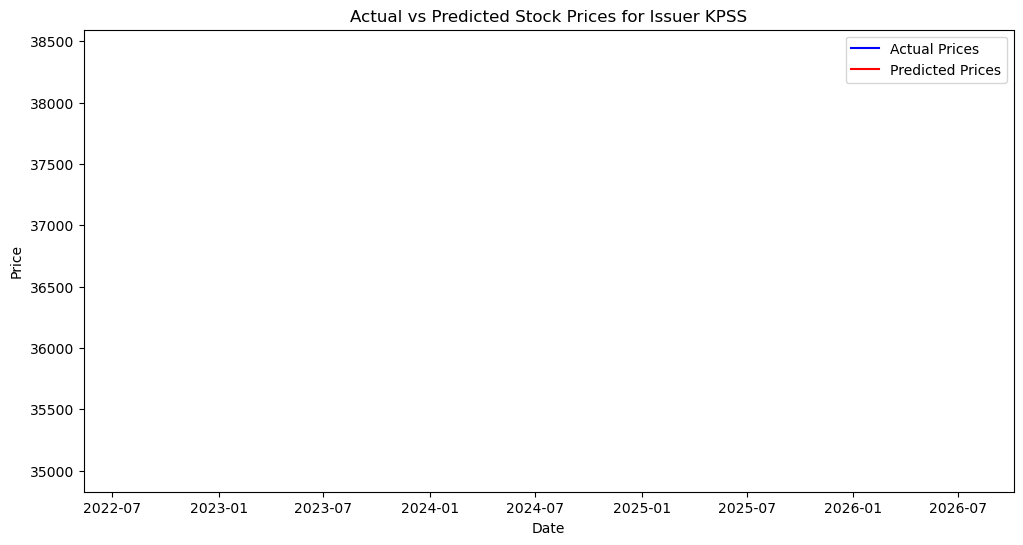

Mean Squared Error for Issuer KPSS: 11710244.406799316
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 0.2472 - val_loss: 0.0620
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0994 - val_loss: 0.0015
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0192 - val_loss: 0.0273
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0407 - val_loss: 0.0167
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0225 - val_loss: 4.7891e-04
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0175 - val_loss: 0.0012
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0228 - val_loss: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0279 - val_loss: 1.7097e-04
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0172 - val_loss: 0.0031
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0151 - val_loss: 0.0043
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0227 - val_loss: 0.0014
Epoch 12/50
4/4 ━━━━━

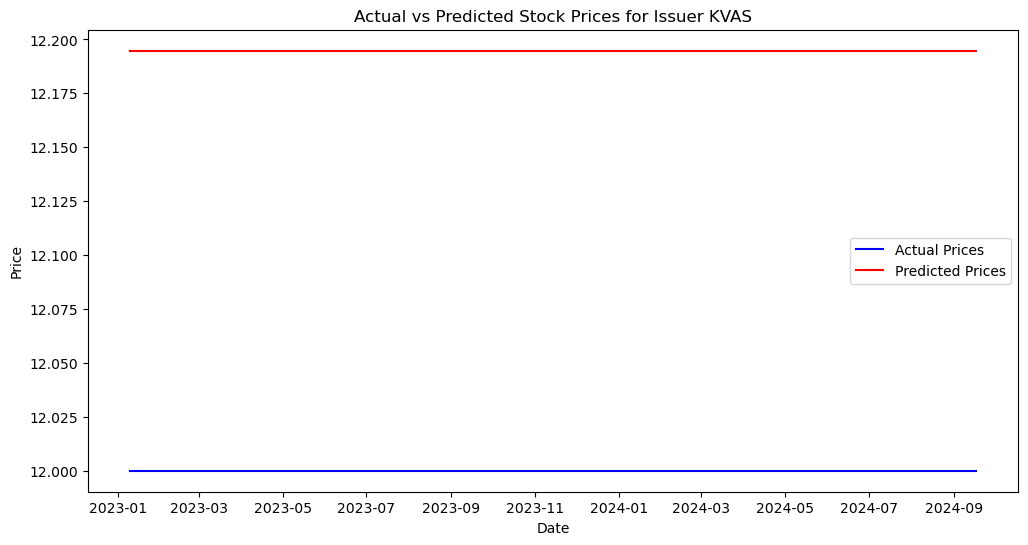

Mean Squared Error for Issuer KVAS: 0.03792601131499396
Недоволно податоци за издавач LHND, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3885 - val_loss: 0.0067
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.3690 - val_loss: 0.0033
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.3350 - val_loss: 0.0011
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2988 - val_loss: 4.9152e-05
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2964 - val_loss: 3.8949e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2853 - val_loss: 0.0022
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2611 - val_loss: 0.0056
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2466 - val_loss: 0.0104
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2629 - val_loss: 0.0159
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2425 - val_loss: 0.0213
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━

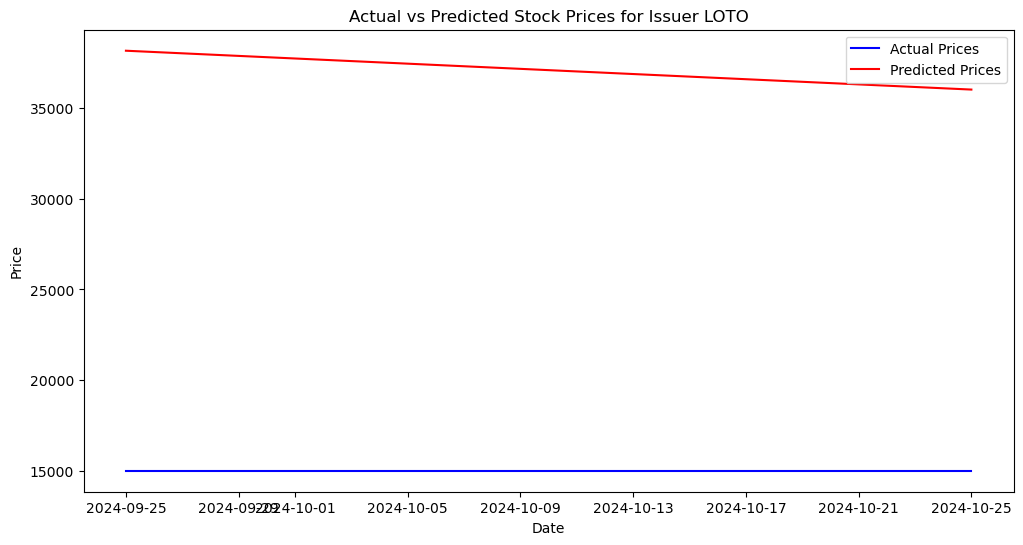

Mean Squared Error for Issuer LOTO: 489210681.25992584
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3386 - val_loss: 0.7934
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.2846 - val_loss: 0.6712
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2615 - val_loss: 0.5558
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2297 - val_loss: 0.4464
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1920 - val_loss: 0.3426
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1647 - val_loss: 0.2455
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1307 - val_loss: 0.1578
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1111 - val_loss: 0.0834
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0807 - val_loss: 0.0286
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0556 - val_loss: 0.0015
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0504 - val_loss: 0.0109
Epoch 12/50
1/1 ━━━━━━━

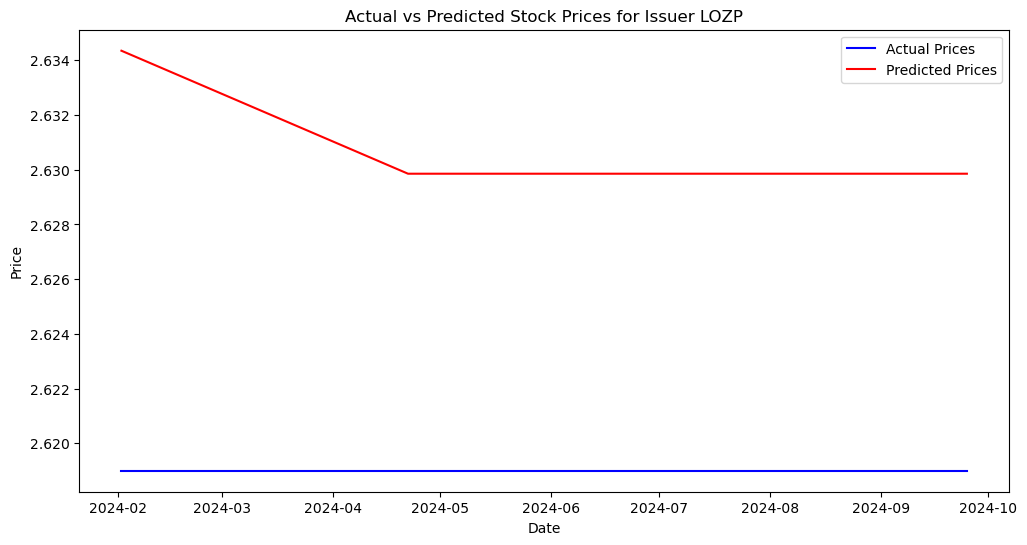

Mean Squared Error for Issuer LOZP: 0.0001571202877866363
Недоволно податоци за издавач MAGP, прескокнување на обработката.
Недоволно податоци за X_test за издавач MAKP. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0000e+00 - val_loss: 9000627.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/

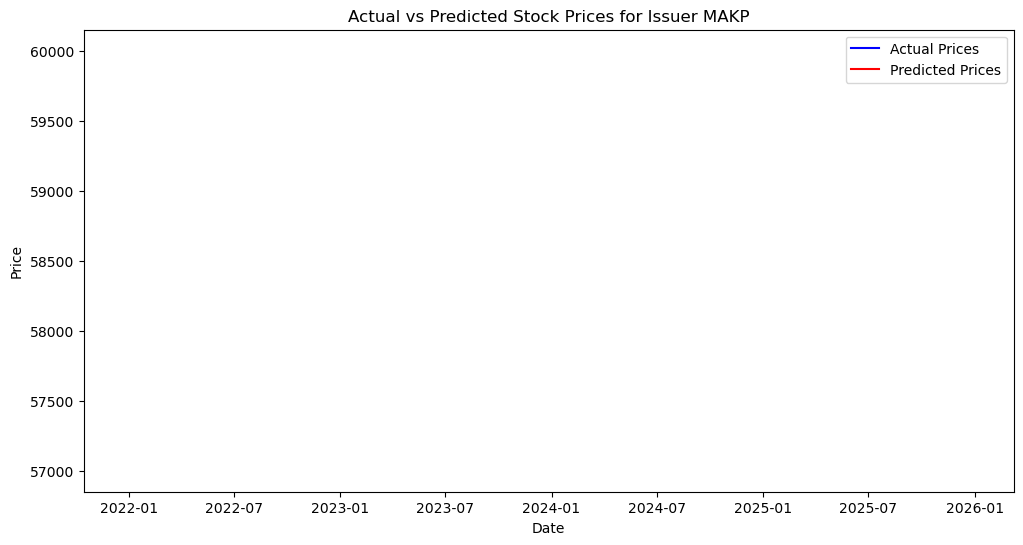

Mean Squared Error for Issuer MAKP: 9000632.823623657
Недоволно податоци за издавач MAKS, прескокнување на обработката.
Недоволно податоци за издавач MB, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.4775e-04 - val_loss: 1.4985e-04
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 2.6937e-04 - val_loss: 4.1880e-05
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1.7459e-04 - val_loss: 1.7586e-06
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 2.4925e-05 - val_loss: 4.8097e-05
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 7.2044e-05 - val_loss: 8.0629e-05
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 2.8107e-04 - val_loss: 5.4144e-05
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1.5319e-04 - val_loss: 1.6774e-05
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 5.6158e-05 - val_loss: 1.5490e-07
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 5.2217e-05 - val_loss: 4.3

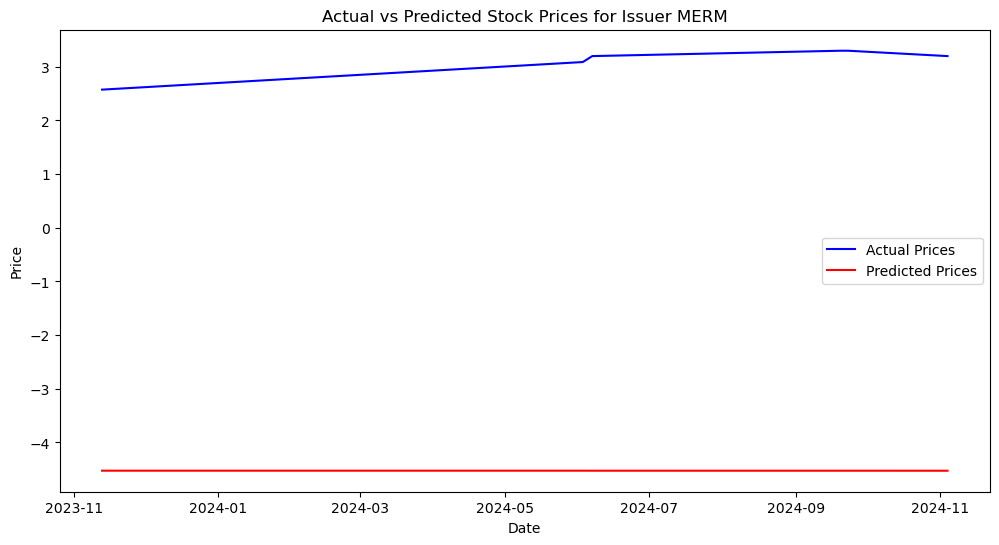

Mean Squared Error for Issuer MERM: 58.38226664243936
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.3019 - val_loss: 0.2120
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1545 - val_loss: 0.0516
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0263 - val_loss: 0.0368
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0361 - val_loss: 0.0288
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0240 - val_loss: 0.0252
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0266 - val_loss: 0.0326
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0256 - val_loss: 0.0257
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0190 - val_loss: 0.0202
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0185 - val_loss: 0.0212
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0201 - val_loss: 0.0203
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0166 - val_loss: 0.0219
Epoch 12/50
5/5 ━━━━━━━━━━━━━━

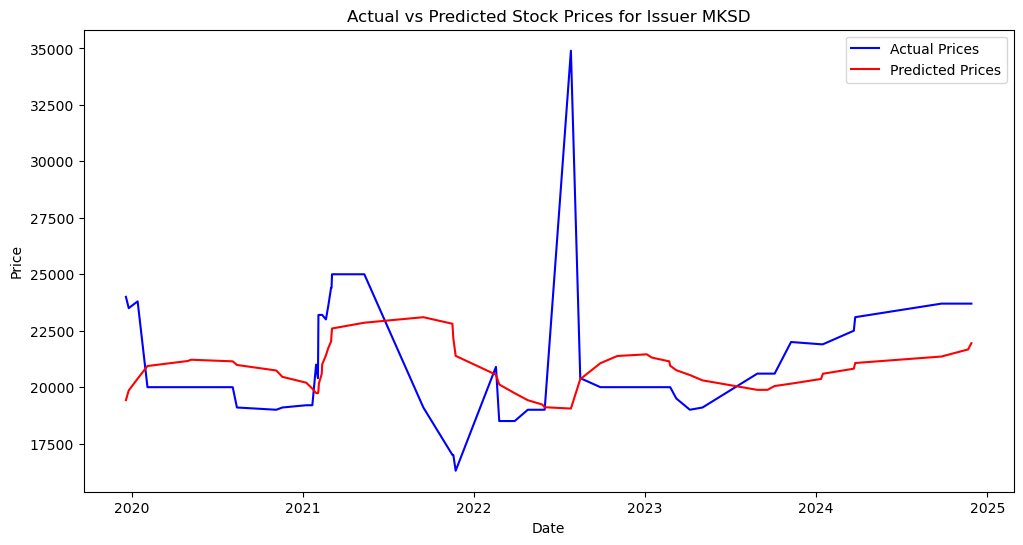

Mean Squared Error for Issuer MKSD: 9167593.021659452
Недоволно податоци за издавач MLKR, прескокнување на обработката.
Недоволно податоци за издавач MODA, прескокнување на обработката.
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.2827 - val_loss: 0.1085
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0892 - val_loss: 0.0217
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0269 - val_loss: 0.0587
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0296 - val_loss: 0.0199
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0214 - val_loss: 0.0223
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0257 - val_loss: 0.0198
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0163 - val_loss: 0.0221
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0174 - val_loss: 0.0265
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0177 - val_loss: 0.0201
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0155 -

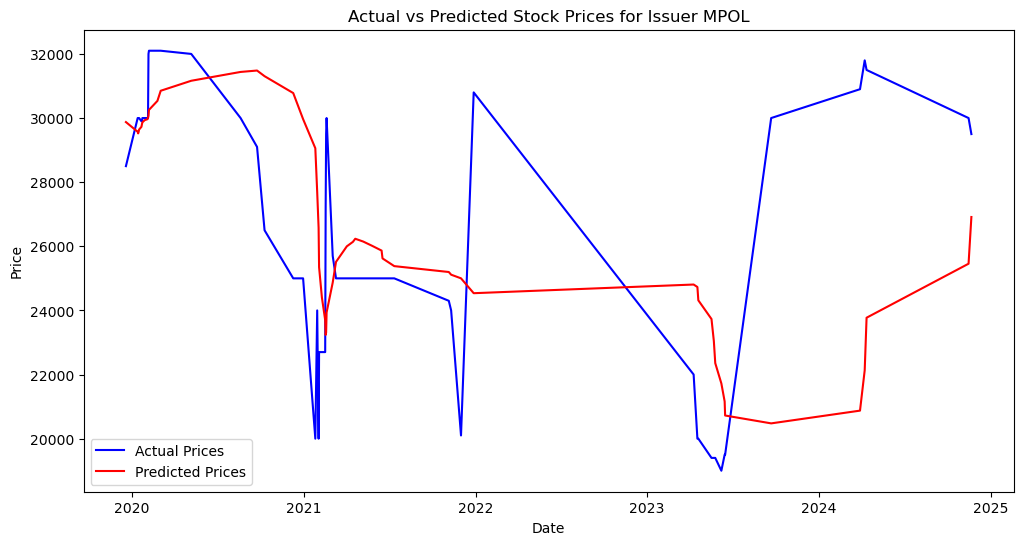

Mean Squared Error for Issuer MPOL: 15097197.441905264
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0901 - val_loss: 8.0528e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036 - val_loss: 7.4672e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_loss: 9.7238e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_loss: 7.0091e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - val_loss: 7.8959e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 7.2080e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - v

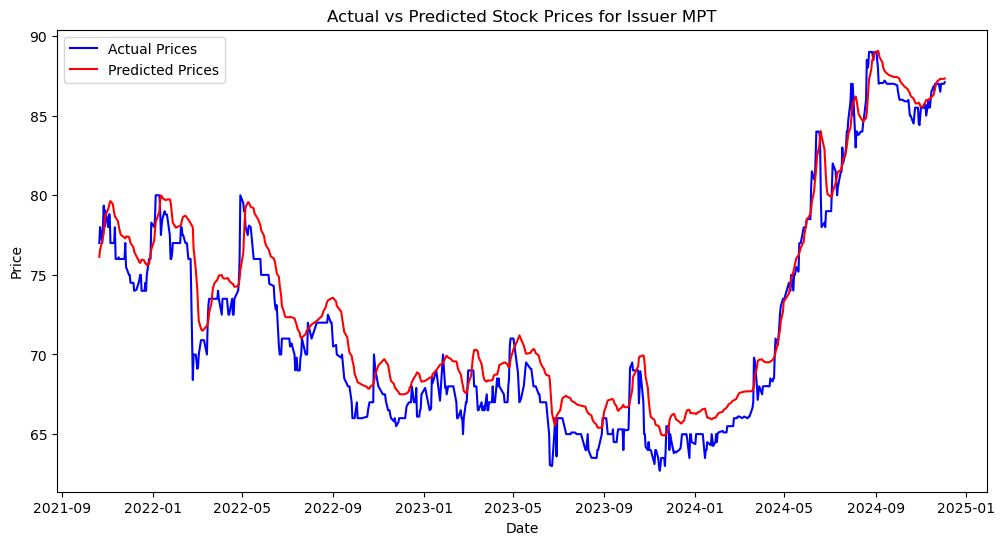

Mean Squared Error for Issuer MPT: 3.517580108419404
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0592 - val_loss: 0.0848
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - val_loss: 0.0249
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067 - val_loss: 0.0257
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - val_loss: 0.0267
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0180
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - val_loss: 0.0183
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059 - val_loss: 0.0269
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - val_loss: 0.0195
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - val_loss: 0.0184
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0051 - val_loss: 0.0239
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - val_loss: 0.0329
Epoch 12/5

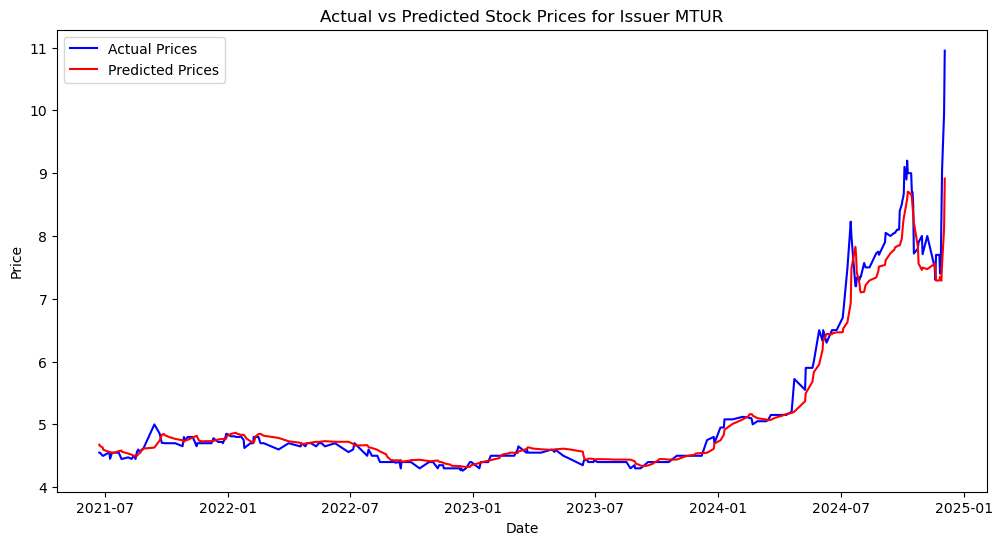

Mean Squared Error for Issuer MTUR: 0.07669211849955754
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - loss: 0.8268 - val_loss: 0.5910
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.5680 - val_loss: 0.3655
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3467 - val_loss: 0.1760
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1601 - val_loss: 0.0420
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0412 - val_loss: 0.0014
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0207 - val_loss: 0.0571
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0815 - val_loss: 0.0808
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1046 - val_loss: 0.0438
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0617 - val_loss: 0.0086
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0192 - val_loss: 2.9193e-04
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0091 - val_loss: 0.0096
Epoch 12/50
2/2 ━━━━━━━━

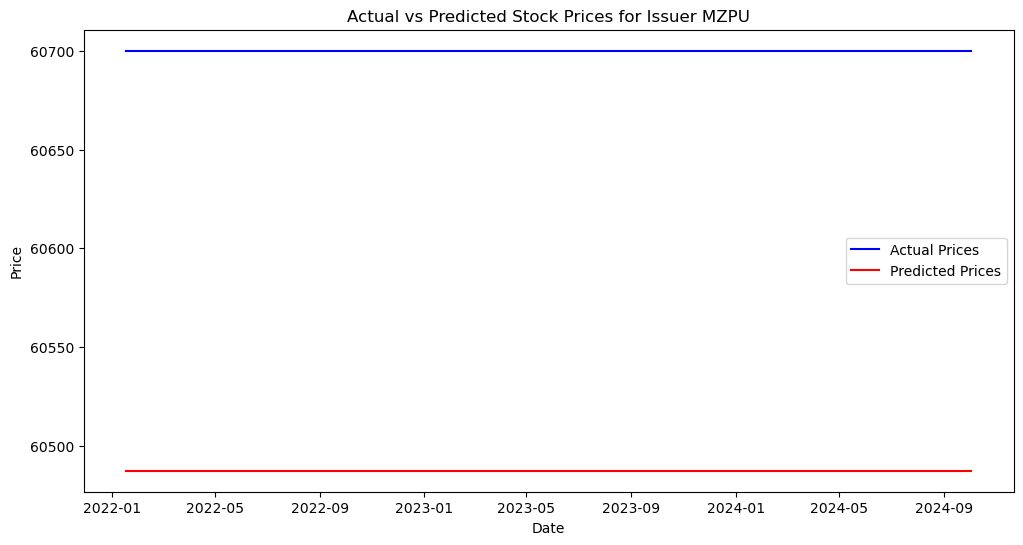

Mean Squared Error for Issuer MZPU: 45161.2306060791
Недоволно податоци за X_test за издавач NEME. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0000e+00 - val_loss: 0.4225
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0000e+00 - v

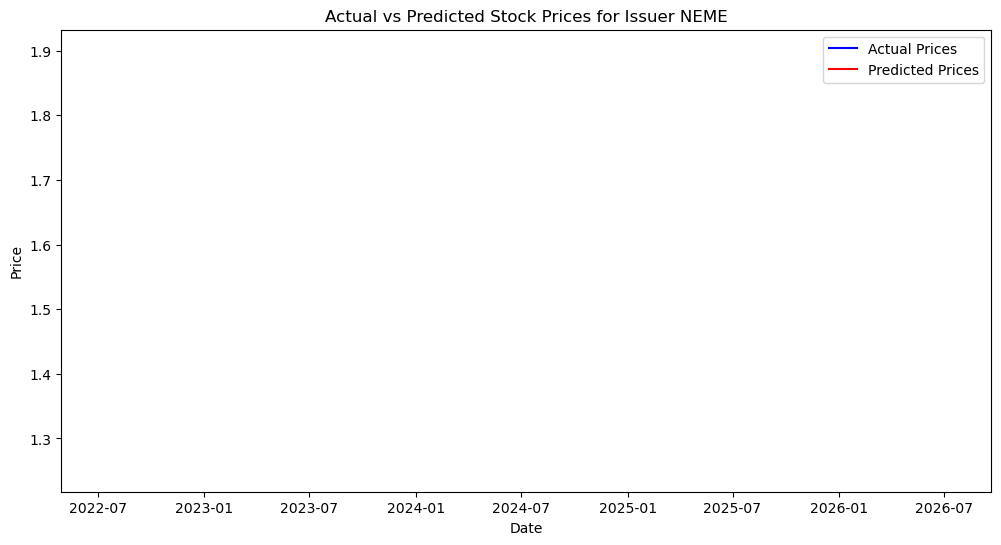

Mean Squared Error for Issuer NEME: 0.42253300969700874
Недоволно податоци за X_test за издавач NOSK. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2072 - val_loss: 5.9294e-05
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1970 - val_loss: 2.3685e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2223 - val_loss: 5.2298e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1697 - val_loss: 9.3399e-04
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.1627 - val_loss: 0.0013
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2565 - val_loss: 0.0016
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1978 - val_loss: 0.0017
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.1706 - val_loss: 0.0016
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2274 - val_loss: 0.0015
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1947 - val_loss: 0.0013
Epoch

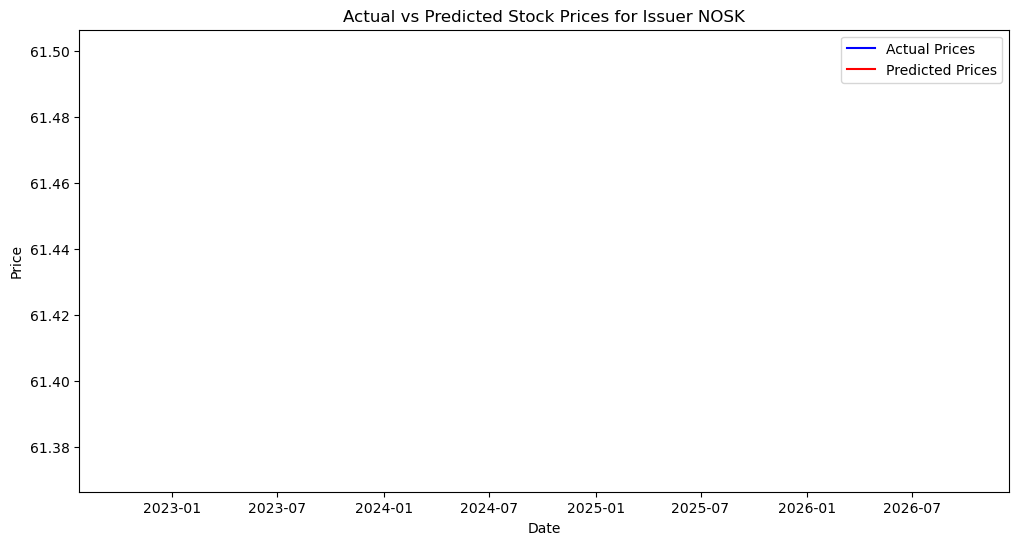

Mean Squared Error for Issuer NOSK: 0.016183996936886626
Недоволно податоци за X_test за издавач OILK. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.5427 - val_loss: 0.4848
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4963 - val_loss: 0.4198
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.4018 - val_loss: 0.3577
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.3446 - val_loss: 0.2986
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.2448 - val_loss: 0.2422
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.2000 - val_loss: 0.1888
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.1277 - val_loss: 0.1392
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0919 - val_loss: 0.0942
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0673 - val_loss: 0.0557
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0426 - val_loss: 0.0257
Epoch 11/50
1/1 ━━━━

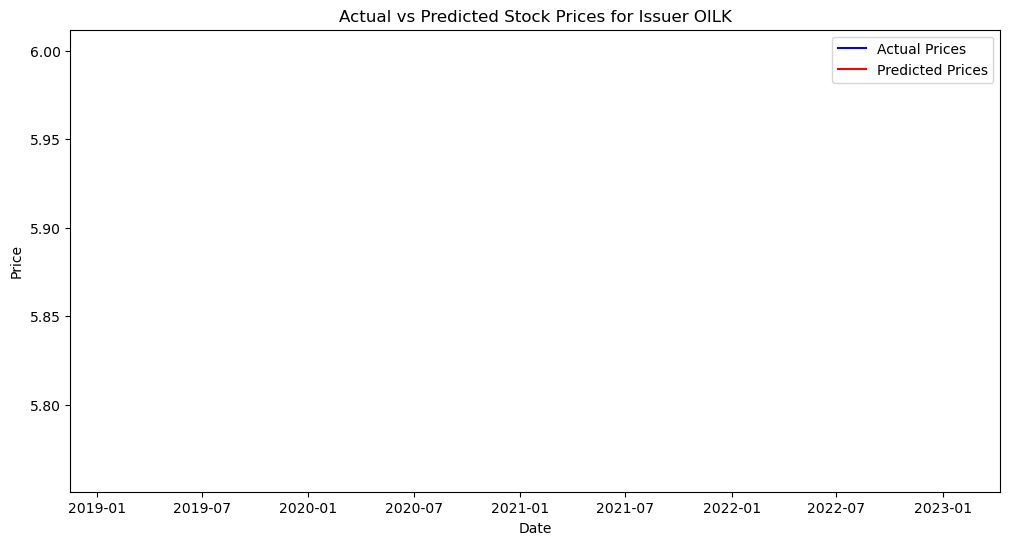

Mean Squared Error for Issuer OILK: 0.056246546460898085
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0575 - val_loss: 1.0801e-04
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0084 - val_loss: 3.0470e-04
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - val_loss: 4.5856e-05
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - val_loss: 2.0734e-05
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - val_loss: 4.3142e-05
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0060 - val_loss: 1.8294e-04
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - val_loss: 1.5754e-05
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - val_loss: 2.1445e-04
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - val_loss: 1.2393e-04
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - val_loss: 3.5876e-04
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 

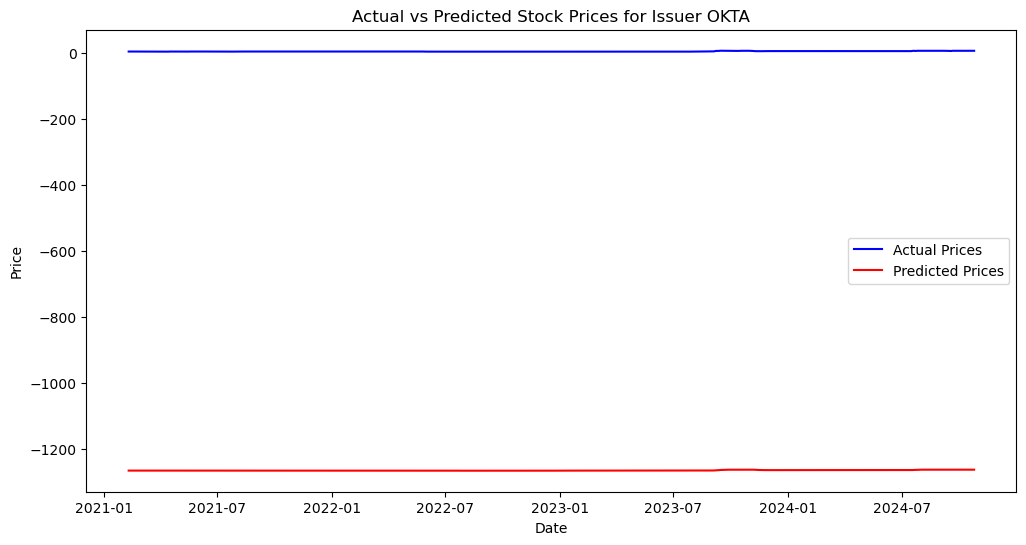

Mean Squared Error for Issuer OKTA: 1613173.3462868866
Недоволно податоци за издавач OMOS, прескокнување на обработката.
Недоволно податоци за издавач OPFO, прескокнување на обработката.
Недоволно податоци за издавач OPTK, прескокнување на обработката.
Недоволно податоци за издавач ORAN, прескокнување на обработката.
Недоволно податоци за издавач OSPO, прескокнување на обработката.
Недоволно податоци за издавач PELK, прескокнување на обработката.
Недоволно податоци за издавач PGGV, прескокнување на обработката.
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.5098 - val_loss: 0.3678
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1888 - val_loss: 0.0554
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0311 - val_loss: 0.0361
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0666 - val_loss: 0.0153
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0289 - val_loss: 0.0123
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0151 - v

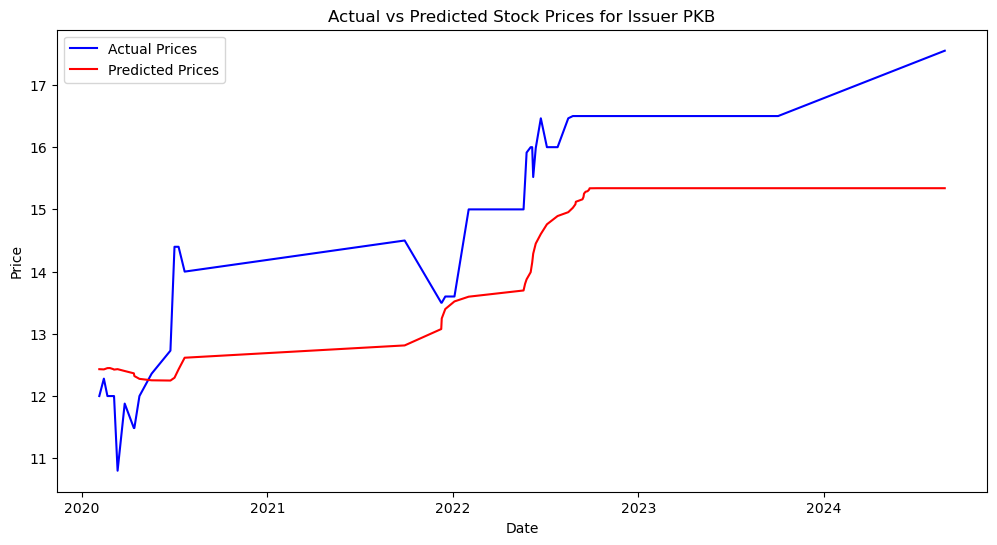

Mean Squared Error for Issuer PKB: 1.5990767739786864
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - loss: 0.2027 - val_loss: 0.2910
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1621 - val_loss: 0.1908
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1076 - val_loss: 0.1096
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0876 - val_loss: 0.0473
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0672 - val_loss: 0.0112
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0604 - val_loss: 0.0087
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0560 - val_loss: 0.0189
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0475 - val_loss: 0.0228
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0489 - val_loss: 0.0198
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0527 - val_loss: 0.0132
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0580 - val_loss: 0.0067
Epoch 12/50
2/2 ━━━━━━━━━━━━━━

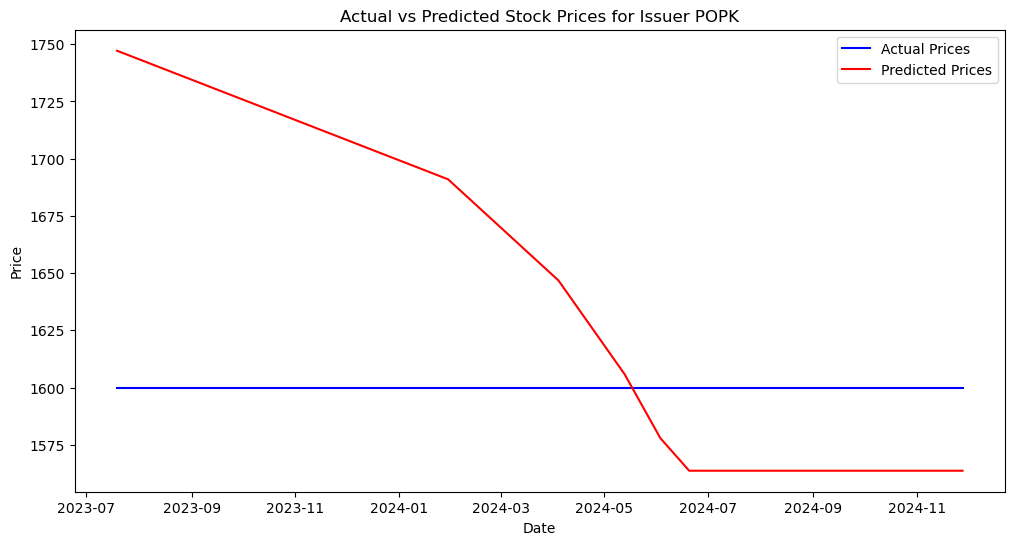

Mean Squared Error for Issuer POPK: 3323.906508398744
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.2090 - val_loss: 0.0165
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0258 - val_loss: 0.0063
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0078 - val_loss: 0.0054
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0061 - val_loss: 0.0086
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042 - val_loss: 0.0074
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049 - val_loss: 0.0074
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046 - val_loss: 0.0077
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━

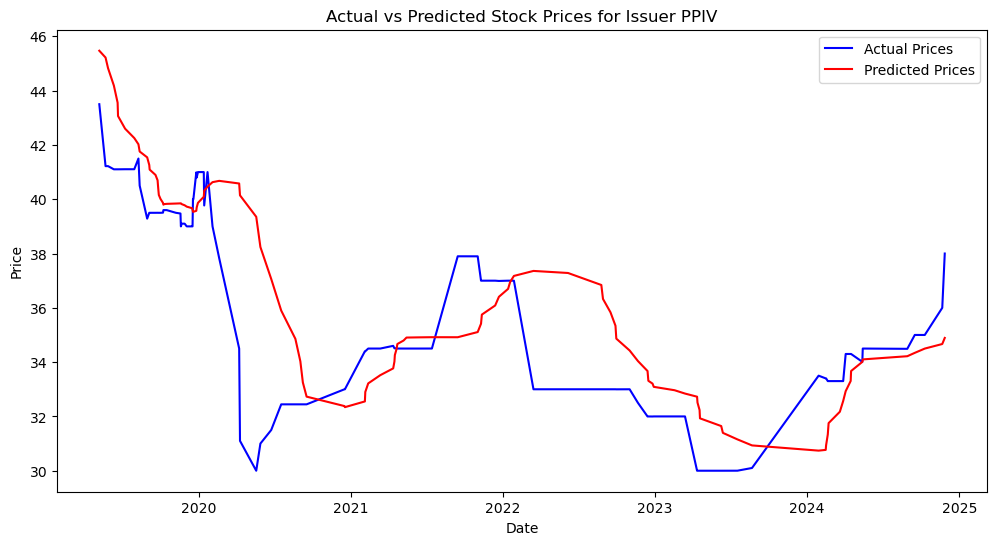

Mean Squared Error for Issuer PPIV: 5.260640717015237
Недоволно податоци за X_test за издавач PROD. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 5.8054e-04 - val_loss: 4.8483e-05
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 2.9341e-06 - val_loss: 1.1931e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 8.2605e-04 - val_loss: 9.5597e-05
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 3.6863e-04 - val_loss: 4.6444e-05
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 5.6841e-05 - val_loss: 1.2209e-05
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 2.0379e-05 - val_loss: 1.2607e-06
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 2.4004e-05 - val_loss: 1.8518e-07
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 8.1181e-04 - val_loss: 3.7923e-08
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 2.0849e-04 - val_loss: 2.7659e-06
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

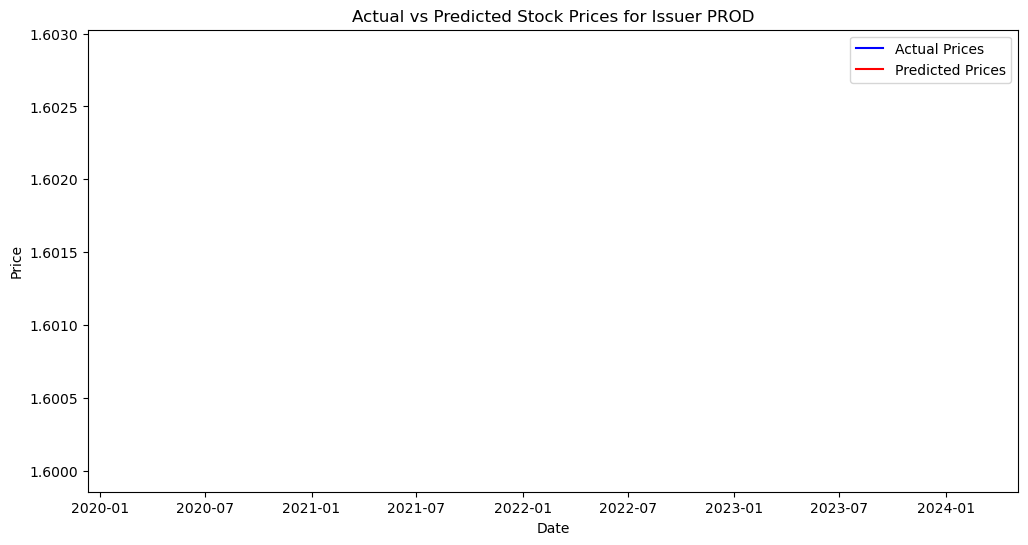

Mean Squared Error for Issuer PROD: 8.306770380385786e-06
Недоволно податоци за издавач PTRS, прескокнување на обработката.
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - loss: 0.1910 - val_loss: 1.2923
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1444 - val_loss: 0.9451
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1007 - val_loss: 0.6184
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0741 - val_loss: 0.3347
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0299 - val_loss: 0.1510
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0243 - val_loss: 0.1303
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0312 - val_loss: 0.1735
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0423 - val_loss: 0.1478
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0337 - val_loss: 0.1219
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0227 - val_loss: 0.1230
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms

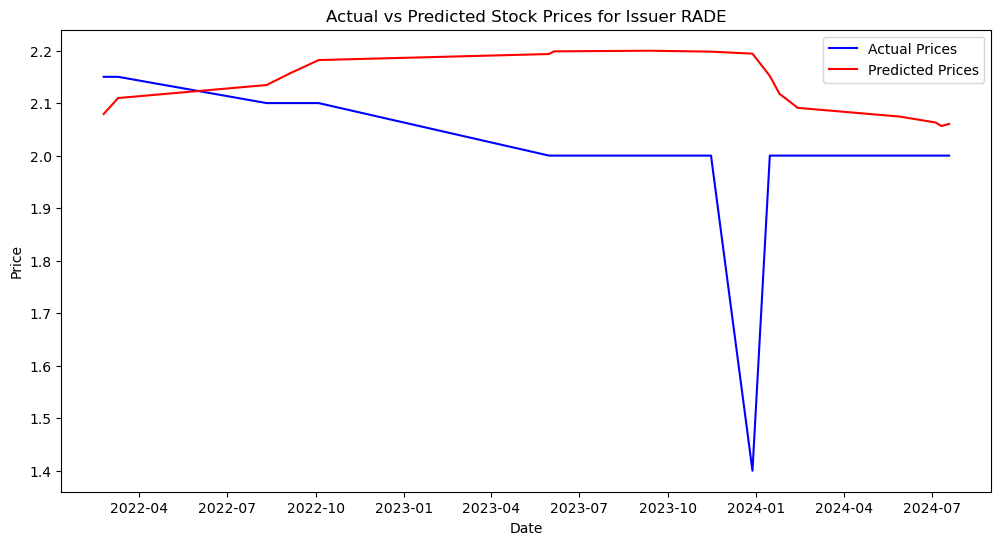

Mean Squared Error for Issuer RADE: 0.05093071824429525
Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1381 - val_loss: 0.0915
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0202 - val_loss: 0.0552
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - val_loss: 0.0475
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0048 - val_loss: 0.0427
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060 - val_loss: 0.0428
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0053 - val_loss: 0.0434
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0040 - val_loss: 0.0410
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047 - val_loss: 0.0426
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - val_loss: 0.0414
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0036 - val_loss: 0.0420
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0038 - val_loss: 0.0413
Epoch 1

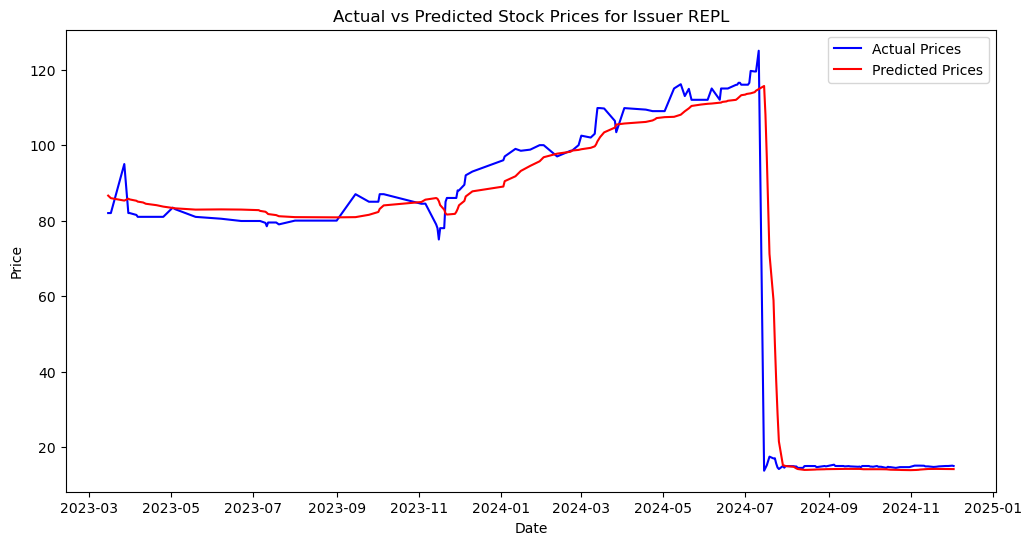

Mean Squared Error for Issuer REPL: 218.14132568915593
Недоволно податоци за издавач RIMI, прескокнување на обработката.
Недоволно податоци за издавач RINS, прескокнување на обработката.
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - loss: 0.1672 - val_loss: 0.1036
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1263 - val_loss: 0.0617
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1024 - val_loss: 0.0289
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0770 - val_loss: 0.0072
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0589 - val_loss: 3.4804e-05
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0636 - val_loss: 0.0055
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0595 - val_loss: 0.0072
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0747 - val_loss: 0.0035
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0654 - val_loss: 2.6967e-04
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss:

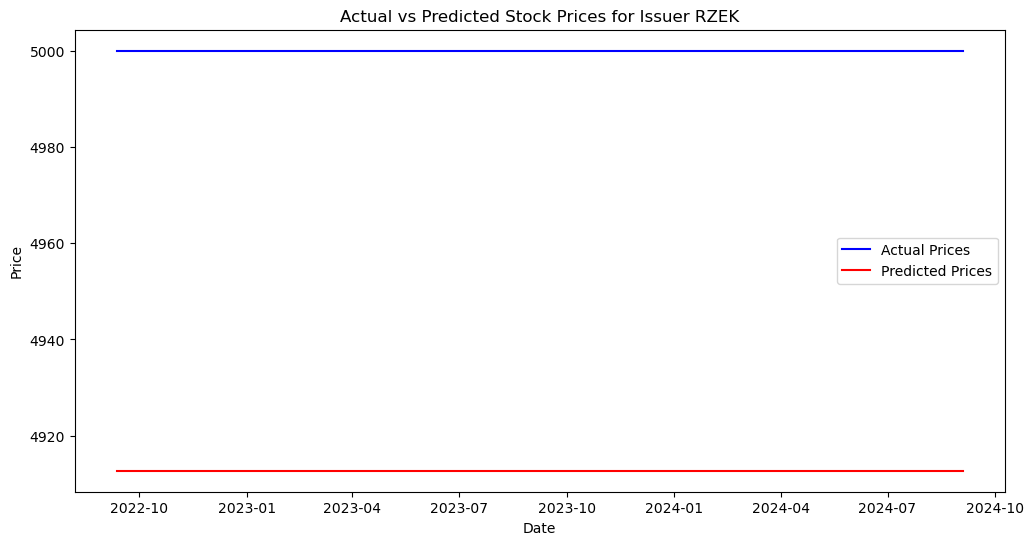

Mean Squared Error for Issuer RZEK: 7615.971084594727
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3328 - val_loss: 0.0334
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2915 - val_loss: 0.0296
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.2497 - val_loss: 0.0288
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1966 - val_loss: 0.0308
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1701 - val_loss: 0.0357
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1433 - val_loss: 0.0437
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1292 - val_loss: 0.0549
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1044 - val_loss: 0.0699
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0901 - val_loss: 0.0889
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0896 - val_loss: 0.1114
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0905 - val_loss: 0.1348
Epoch 12/50
1/1 ━━━━━━━━━━━

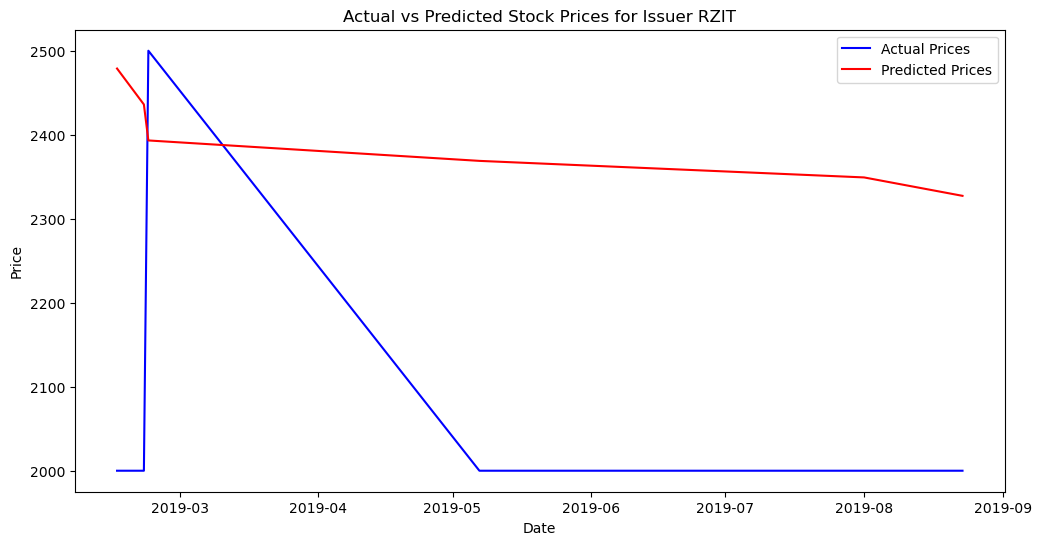

Mean Squared Error for Issuer RZIT: 132635.4673702816
Недоволно податоци за издавач RZIZ, прескокнување на обработката.
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 0.0687 - val_loss: 0.0121
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0367 - val_loss: 0.0075
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0191 - val_loss: 0.0157
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0308 - val_loss: 0.0088
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0212 - val_loss: 0.0051
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0193 - val_loss: 0.0050
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0265 - val_loss: 0.0048
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0187 - val_loss: 0.0055
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0183 - val_loss: 0.0063
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0184 - val_loss: 0.0056
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/ste

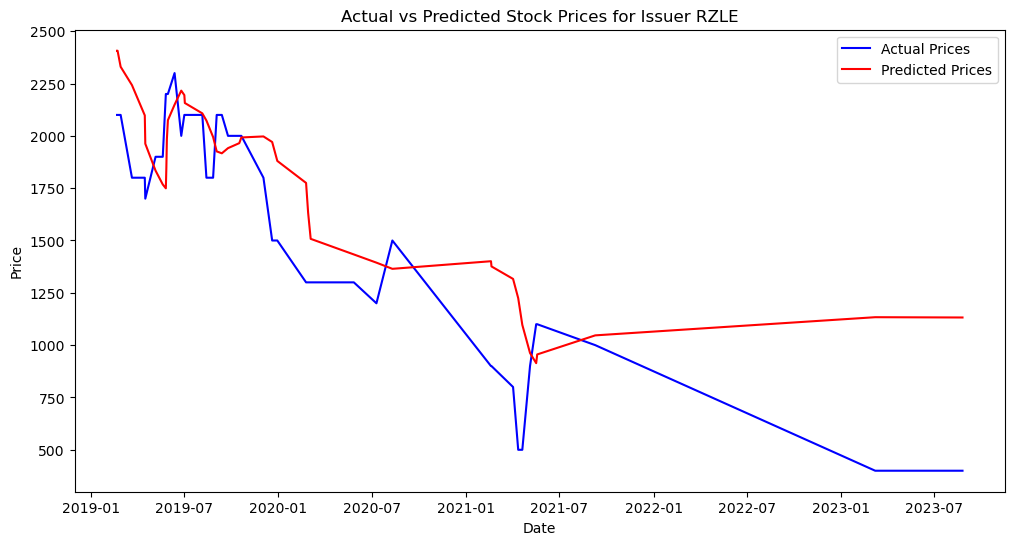

Mean Squared Error for Issuer RZLE: 111094.0188788951
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.1488 - val_loss: 0.0169
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0275 - val_loss: 0.0242
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0272 - val_loss: 0.0117
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0225 - val_loss: 0.0094
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0187 - val_loss: 0.0085
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0167 - val_loss: 0.0084
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0153 - val_loss: 0.0079
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0150 - val_loss: 0.0075
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - val_loss: 0.0078
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - val_loss: 0.0072
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - val_loss: 0.0077
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━

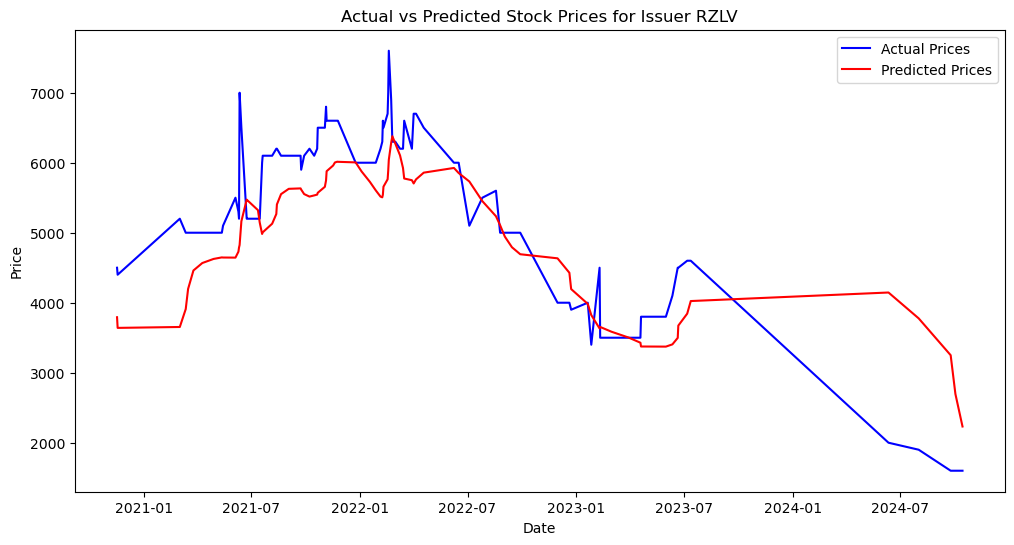

Mean Squared Error for Issuer RZLV: 602619.6228124355
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - loss: 0.2668 - val_loss: 0.0615
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1265 - val_loss: 0.0448
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0545 - val_loss: 0.0538
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0356 - val_loss: 0.0753
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0476 - val_loss: 0.0706
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0343 - val_loss: 0.0558
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0317 - val_loss: 0.0464
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0297 - val_loss: 0.0433
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0304 - val_loss: 0.0428
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0354 - val_loss: 0.0432
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0327 - val_loss: 0.0442
Epoch 12/50
3/3 ━━━━━━━━━━━━━━

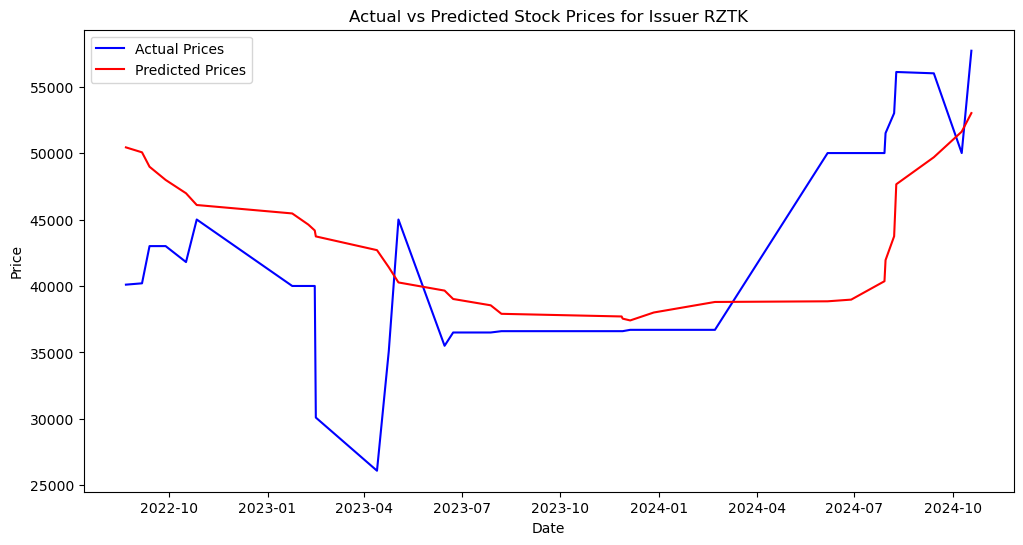

Mean Squared Error for Issuer RZTK: 51635547.728749275
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3393 - val_loss: 1.3577
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.3085 - val_loss: 1.1348
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2789 - val_loss: 0.9346
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.2563 - val_loss: 0.7538
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.2339 - val_loss: 0.5903
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2206 - val_loss: 0.4444
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.2043 - val_loss: 0.3149
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.1857 - val_loss: 0.2038
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.1753 - val_loss: 0.1140
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.1677 - val_loss: 0.0509
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.1541 - val_loss: 0.0142
Epoch 12/50
1/1 ━━━━━━

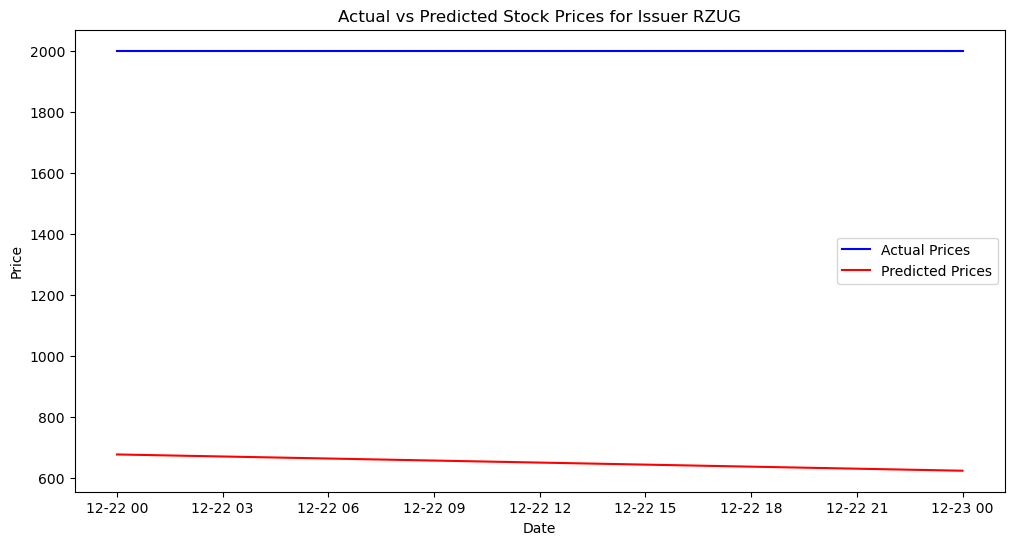

Mean Squared Error for Issuer RZUG: 1819174.55455627
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.1604 - val_loss: 0.0442
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - val_loss: 0.0294
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - val_loss: 0.0244
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - val_loss: 0.0207
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - val_loss: 0.0130
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0088 - val_loss: 0.0098
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0086 - val_loss: 0.0067
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0083 - val_loss: 0.0063
Epoch 12/5

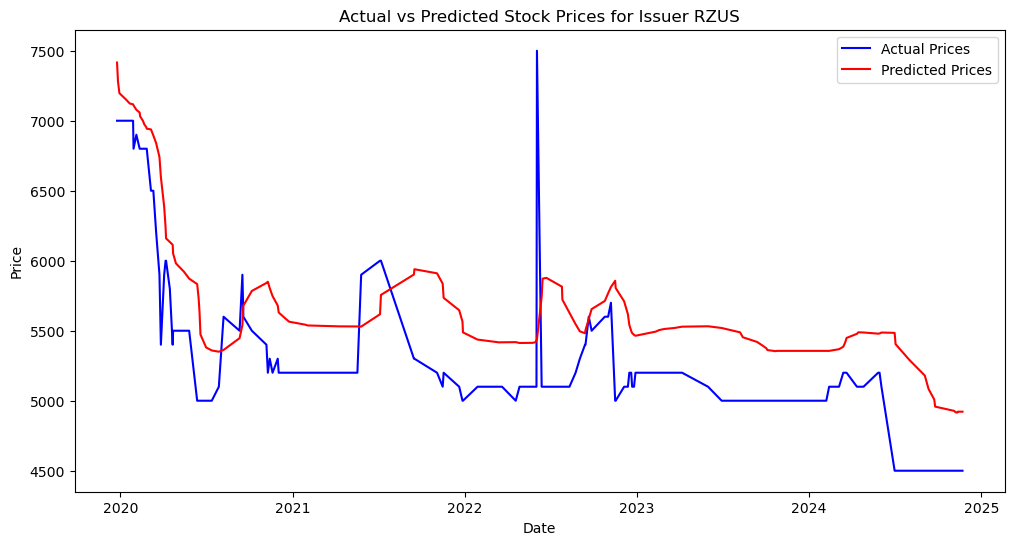

Mean Squared Error for Issuer RZUS: 223248.67673763898
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1350 - val_loss: 0.0085
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - val_loss: 0.0071
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - val_loss: 0.0099
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 12

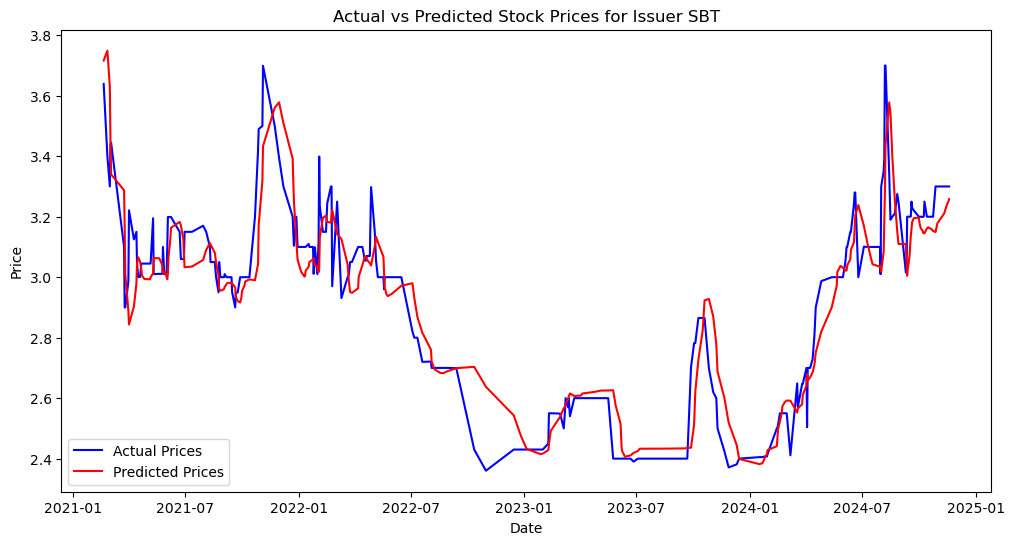

Mean Squared Error for Issuer SBT: 0.014223261954874772
Недоволно податоци за издавач SDOM, прескокнување на обработката.
Недоволно податоци за X_test за издавач SIL. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0

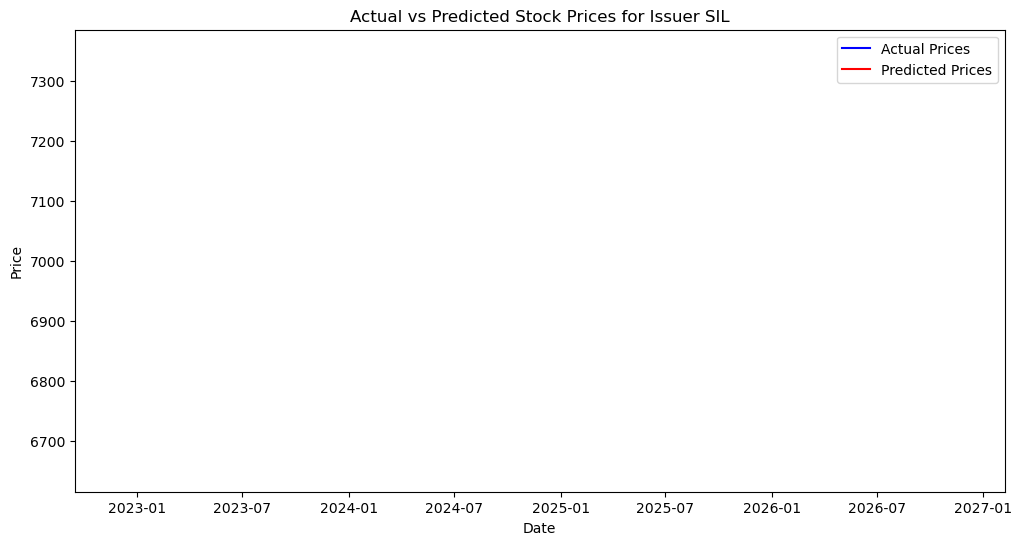

Mean Squared Error for Issuer SIL: 0.0
Недоволно податоци за издавач SKON, прескокнување на обработката.
Недоволно податоци за издавач SKP, прескокнување на обработката.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0231 - val_loss: 1.3242e-04
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0160 - val_loss: 2.3758e-05
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0096 - val_loss: 4.5577e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0068 - val_loss: 0.0014
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0038 - val_loss: 0.0065
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0042 - val_loss: 0.0076
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0058 - val_loss: 0.0077
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0053

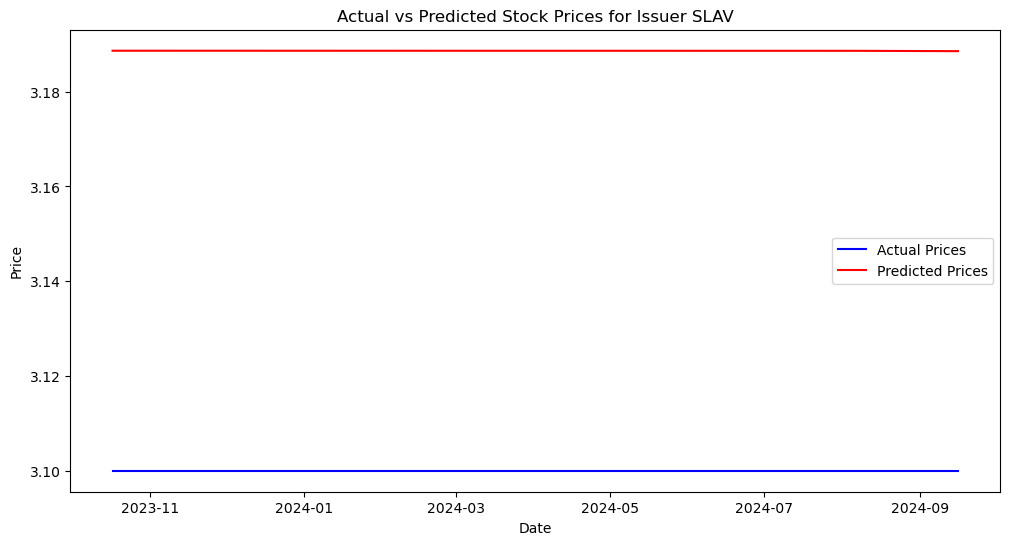

Mean Squared Error for Issuer SLAV: 0.007849071469977374
Недоволно податоци за издавач SNBTO, прескокнување на обработката.
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - loss: 0.2869 - val_loss: 0.5304
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.2121 - val_loss: 0.4471
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1375 - val_loss: 0.3802
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1103 - val_loss: 0.3101
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0959 - val_loss: 0.2460
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1177 - val_loss: 0.2193
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1367 - val_loss: 0.2302
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.1196 - val_loss: 0.2591
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1176 - val_loss: 0.2986
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0968 - val_loss: 0.3302
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95

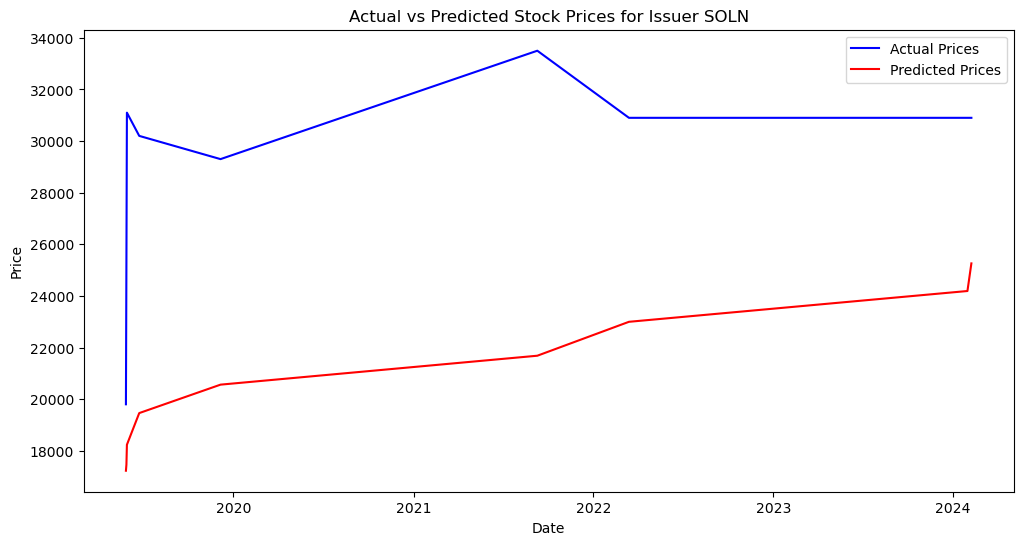

Mean Squared Error for Issuer SOLN: 78263882.82483461
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0934 - val_loss: 3.2820
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0282 - val_loss: 1.7460
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0272 - val_loss: 1.7394
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0158 - val_loss: 2.0741
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0169 - val_loss: 2.1037
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0172 - val_loss: 1.9100
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0126 - val_loss: 1.6705
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0120 - val_loss: 1.4868
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0134 - val_loss: 1.4308
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145 - val_loss: 1.3906
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0127 - val_loss: 1.3367
Epoch 12/50
5/5 ━━━━━━━━━━━━━━

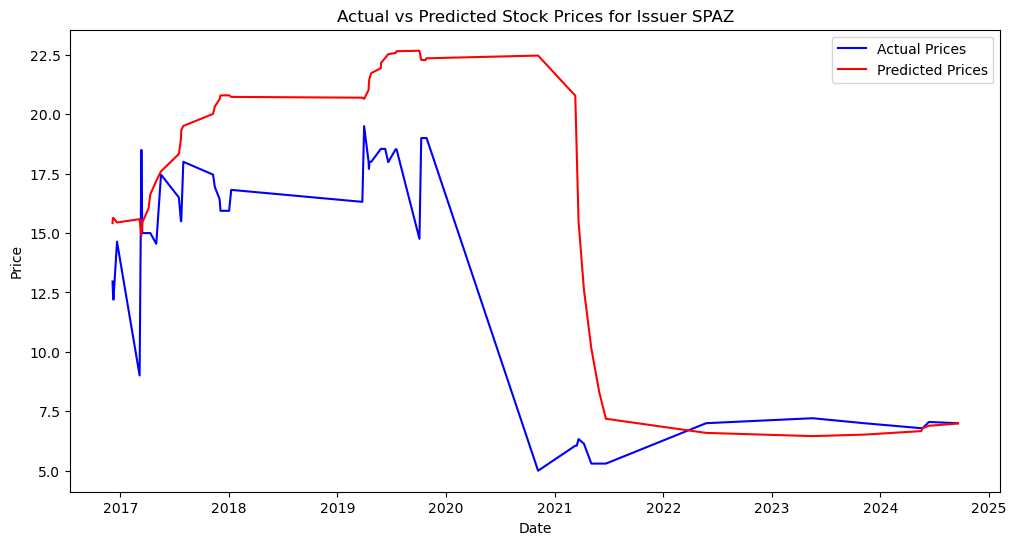

Mean Squared Error for Issuer SPAZ: 25.39640653585981
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2175 - val_loss: 0.5706
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1913 - val_loss: 0.4493
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1569 - val_loss: 0.3534
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1287 - val_loss: 0.2859
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.1124 - val_loss: 0.2535
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0893 - val_loss: 0.2657
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0726 - val_loss: 0.3346
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0557 - val_loss: 0.4736
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0478 - val_loss: 0.6858
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0546 - val_loss: 0.9470
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0527 - val_loss: 1.1927
Epoch 12/50
1/1 ━━━━━━━━

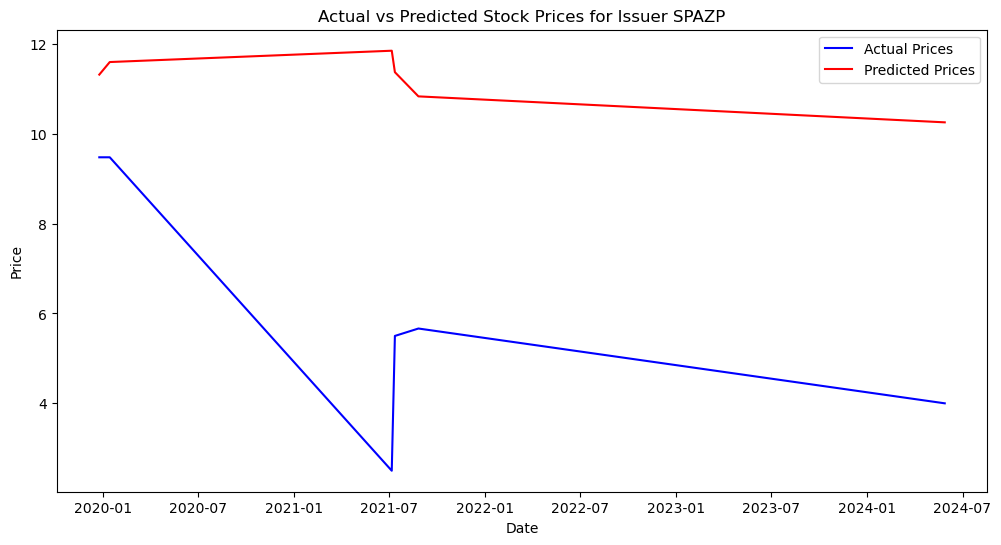

Mean Squared Error for Issuer SPAZP: 32.58765075320795
Недоволно податоци за издавач SSPR, прескокнување на обработката.
Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0969 - val_loss: 2.3353e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0193 - val_loss: 6.2759e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0213 - val_loss: 1.0454e-05
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - val_loss: 3.9569e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - val_loss: 2.5543e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0190 - val_loss: 6.0874e-05
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0216 - val_loss: 3.9383e-05
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0131 - val_loss: 1.9862e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0207 - val_loss: 1.1710e-06
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0118 - val_loss:

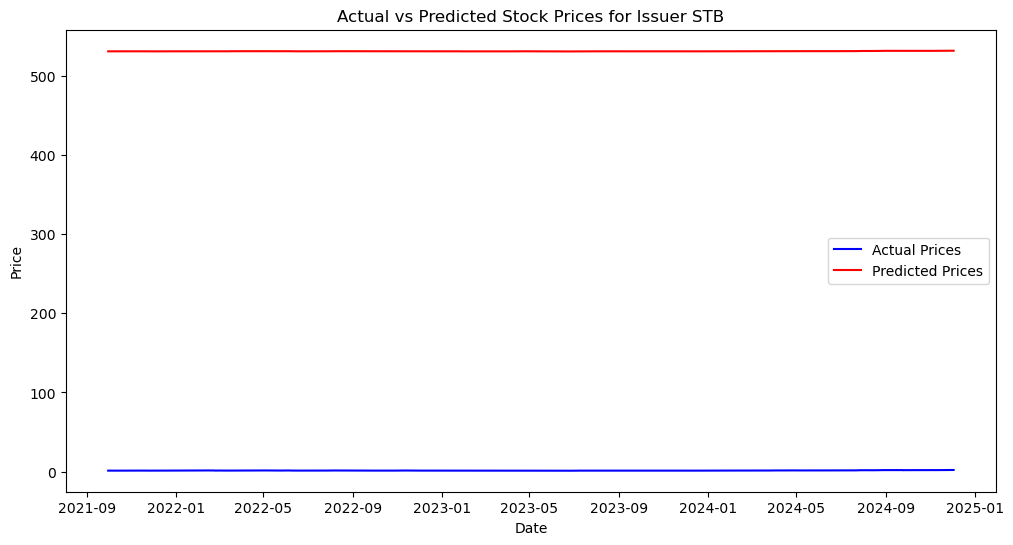

Mean Squared Error for Issuer STB: 280213.8681743013
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.2458 - val_loss: 0.0387
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0533 - val_loss: 0.0365
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0510 - val_loss: 0.0510
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0470 - val_loss: 0.0357
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0406 - val_loss: 0.0341
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0362 - val_loss: 0.0367
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0393 - val_loss: 0.0338
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0287 - val_loss: 0.0339
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0305 - val_loss: 0.0331
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0321 - val_loss: 0.0329
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0397 - val_loss: 0.0315
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━

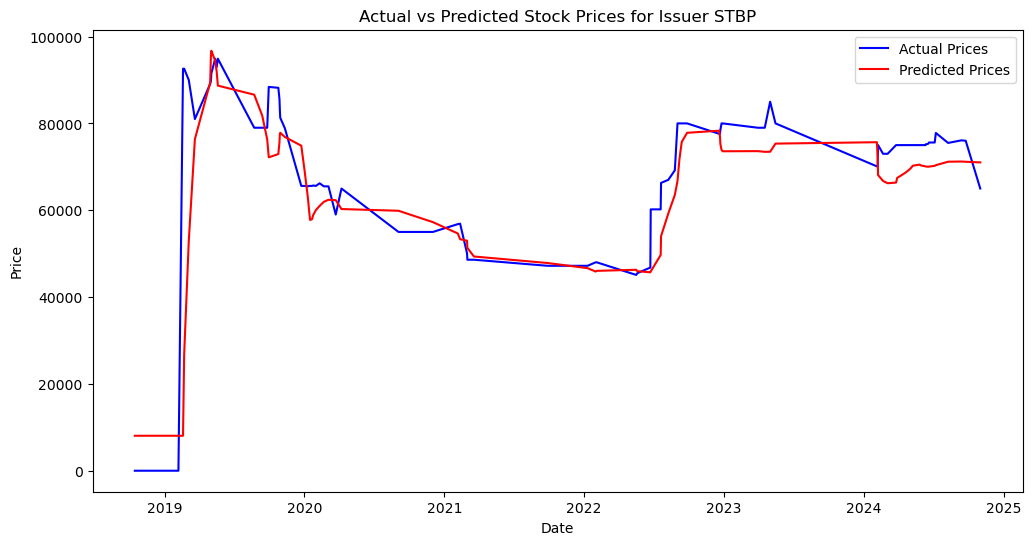

Mean Squared Error for Issuer STBP: 152811582.85023955
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0865 - val_loss: 0.0100
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0050 - val_loss: 0.0023
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0039 - val_loss: 0.0022
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 12

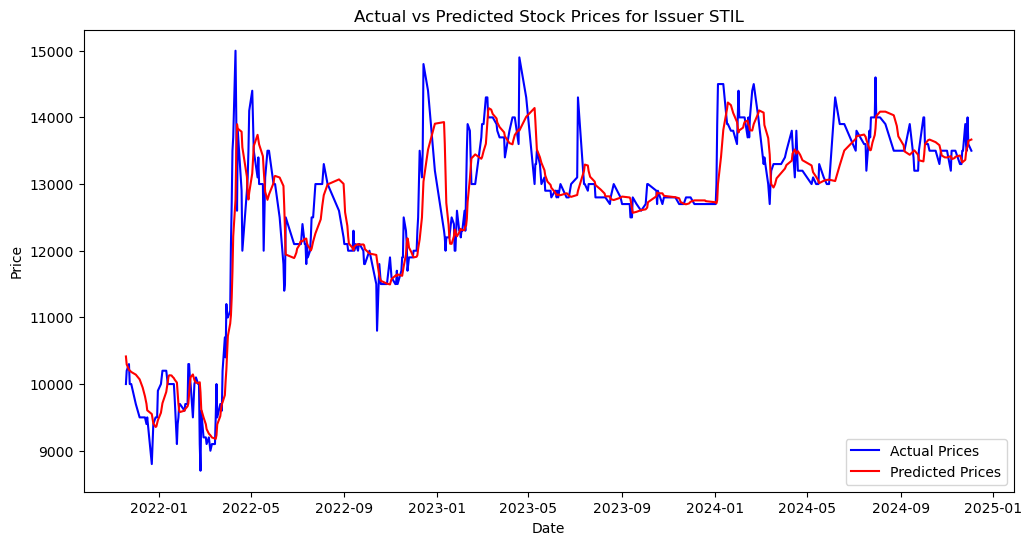

Mean Squared Error for Issuer STIL: 231527.3543134739
Недоволно податоци за издавач STOK, прескокнување на обработката.
Недоволно податоци за издавач TAJM, прескокнување на обработката.
Недоволно податоци за издавач TBKO, прескокнување на обработката.
Недоволно податоци за издавач TEAL, прескокнување на обработката.
Недоволно податоци за издавач TEHN, прескокнување на обработката.
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0948 - val_loss: 0.0868
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0036
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0041
Epoch 8/50
32/32 ━━━━

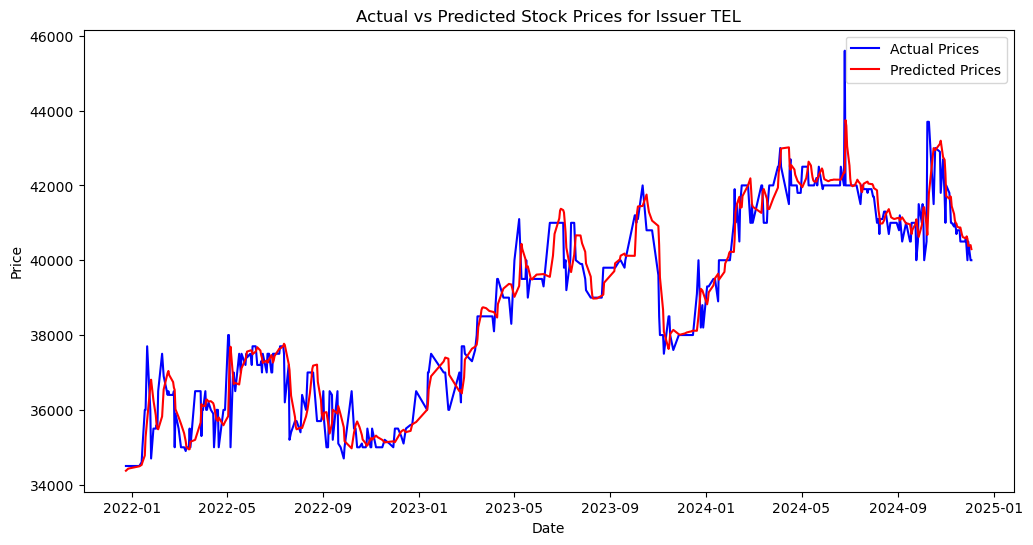

Mean Squared Error for Issuer TEL: 428052.6977543708
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0602 - val_loss: 0.0078
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - val_loss: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - val_loss: 1.0103e-06
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0108 - val_loss: 5.7047e-05
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0208 - val_loss: 2.6961e-05
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - val_loss: 1.3385e-04
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - val_loss: 6.8238e-04
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0090 - val_loss: 2.9332e-04
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141 - val_loss: 1.9566e-04
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0056 - val_loss: 1.8785e-04
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.01

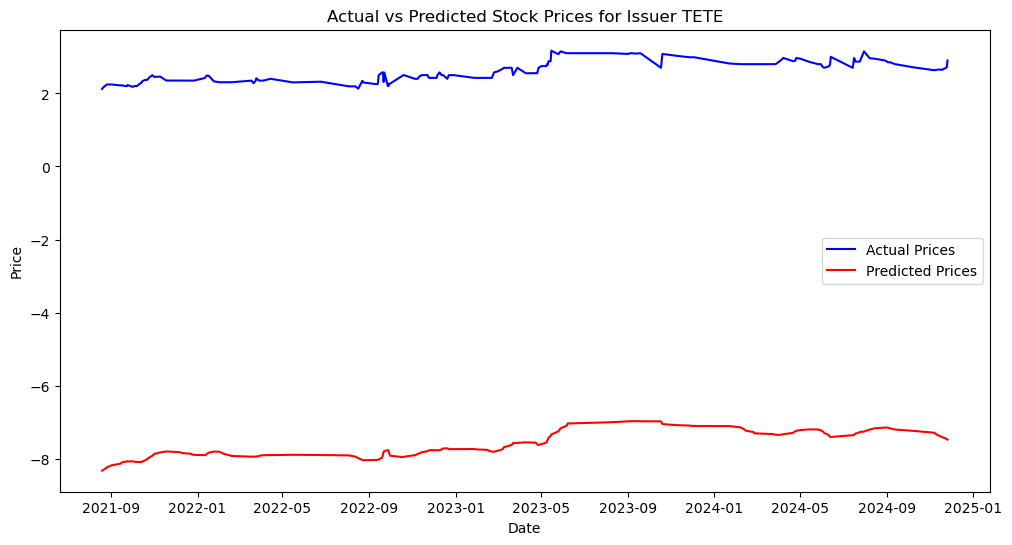

Mean Squared Error for Issuer TETE: 104.37470066741473
Недоволно податоци за X_test за издавач TIKV. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.8202e-08 - val_loss: 8.4795e-05
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0039 - val_loss: 2.9200e-06
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0015 - val_loss: 1.7519e-07
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 4.2760e-04 - val_loss: 4.8170e-07
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 7.4145e-04 - val_loss: 6.8410e-06
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.0486e-04 - val_loss: 1.2734e-05
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0036 - val_loss: 1.8856e-06
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0026 - val_loss: 5.1735e-06
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6.8728e-05 - val_loss: 3.3384e-05
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss:

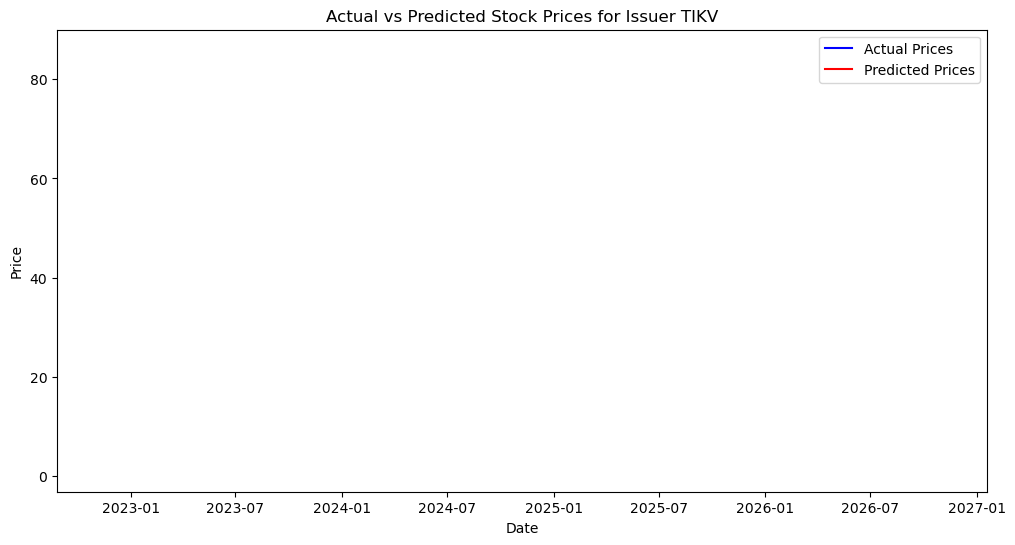

Mean Squared Error for Issuer TIKV: 7188.454153403232
Премалку податоци за издавач TKPR. Намалување на look_back.
Недоволно податоци за X_test за издавач TKPR. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.8767 - val_loss: 0.7761
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8571 - val_loss: 0.7603
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.7911 - val_loss: 0.7441
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.7043 - val_loss: 0.7280
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.7279 - val_loss: 0.7122
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.6372 - val_loss: 0.6963
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.6611 - val_loss: 0.6804
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.5722 - val_loss: 0.6644
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.5633 - val_loss: 0.6481
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/st

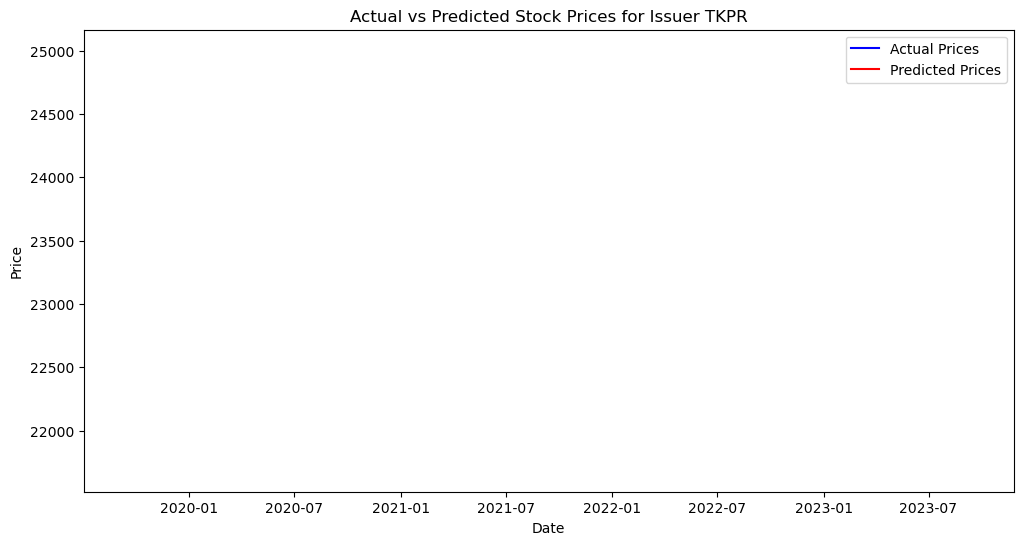

Mean Squared Error for Issuer TKPR: 11001841.157974243
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.2856 - val_loss: 0.0597
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0245 - val_loss: 0.0181
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0223 - val_loss: 0.0508
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0261 - val_loss: 0.0185
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0118 - val_loss: 0.0023
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0135 - val_loss: 0.0096
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0094 - val_loss: 0.0053
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0101 - val_loss: 0.0071
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0086 - val_loss: 0.0019
Epoch 12/50
8/8 ━━━━━━━━━━━━━━

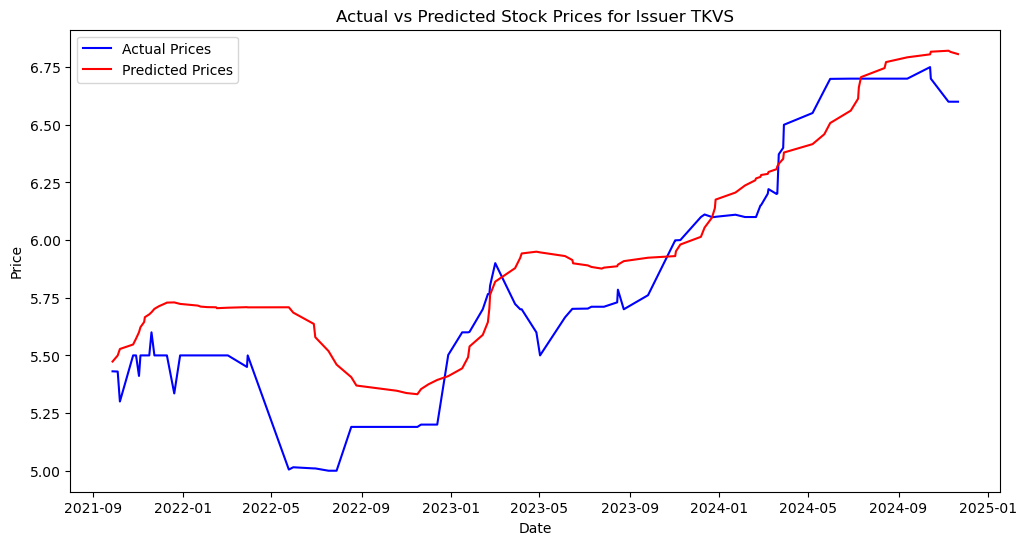

Mean Squared Error for Issuer TKVS: 0.04761919328888227
Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0639 - val_loss: 0.0027
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018 - val_loss: 0.0068
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 1

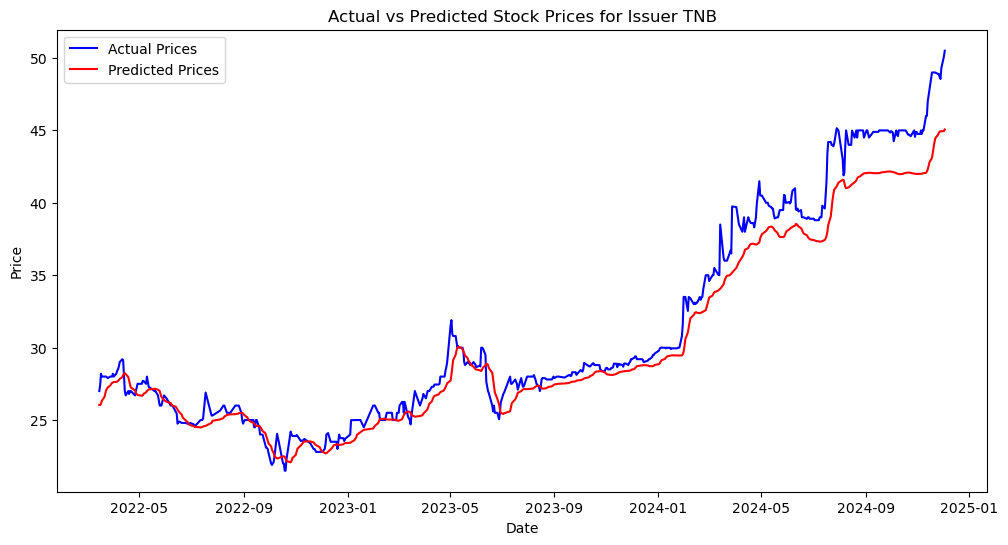

Mean Squared Error for Issuer TNB: 3.1359525488249558
Недоволно податоци за X_test за издавач TRPS. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.9982 - val_loss: 2.4534
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.9467 - val_loss: 2.2988
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.8580 - val_loss: 2.1475
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.7735 - val_loss: 1.9989
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.7267 - val_loss: 1.8517
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.5984 - val_loss: 1.7041
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.5593 - val_loss: 1.5554
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5342 - val_loss: 1.4050
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.4331 - val_loss: 1.2528
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.3737 - val_loss: 1.0995
Epoch 11/50
1/1 ━━━━━━━━━━━━━━

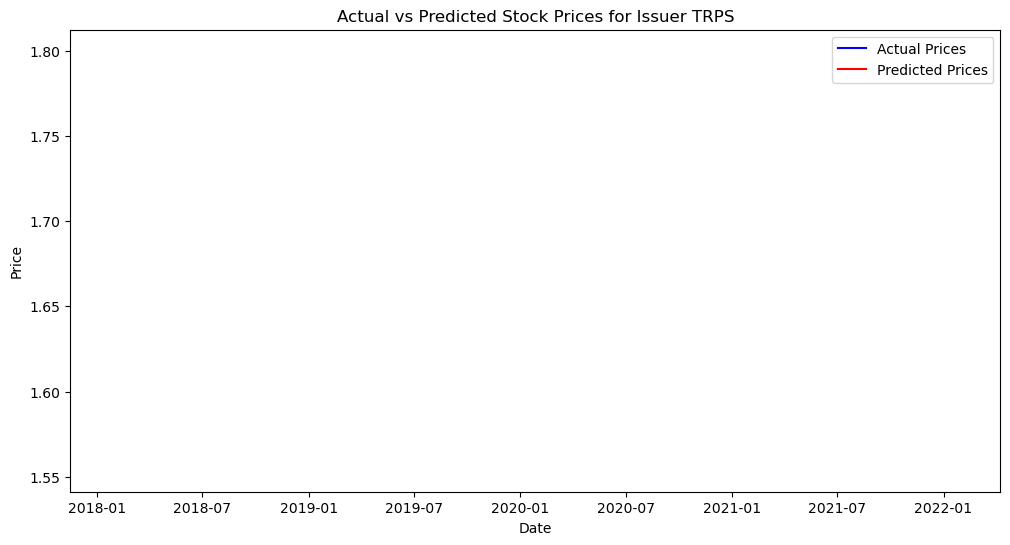

Mean Squared Error for Issuer TRPS: 0.06074476877460258
Недоволно податоци за издавач TRUB, прескокнување на обработката.
Премалку податоци за издавач TSMP. Намалување на look_back.
Недоволно податоци за X_test за издавач TSMP. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.8180e-04 - val_loss: 0.2218
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 3.8283e-04 - val_loss: 0.2229
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 3.8034e-04 - val_loss: 0.2206
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0015 - val_loss: 0.2231
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 3.3308e-05 - val_loss: 0.2246
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 1.7572e-04 - val_loss: 0.2249
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 4.8440e-04 - val_loss: 0.2265
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 8.7033e-04 - val_loss: 0.2262
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

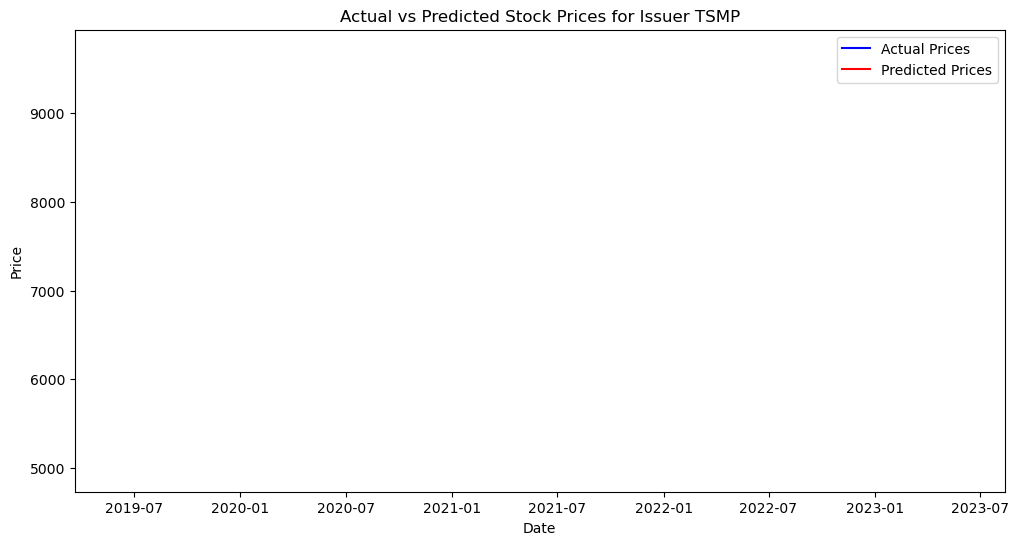

Mean Squared Error for Issuer TSMP: 22359331.02283573
Недоволно податоци за издавач TSZS, прескокнување на обработката.
Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.1333 - val_loss: 0.0018
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0314 - val_loss: 1.3889e-05
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0259 - val_loss: 4.9888e-05
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - val_loss: 1.4587e-04
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0251 - val_loss: 2.2077e-04
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - val_loss: 3.7236e-05
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0225 - val_loss: 4.1967e-06
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0196 - val_loss: 6.5073e-05
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0355 - val_loss: 1.8775e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0213 - val_loss: 3.7

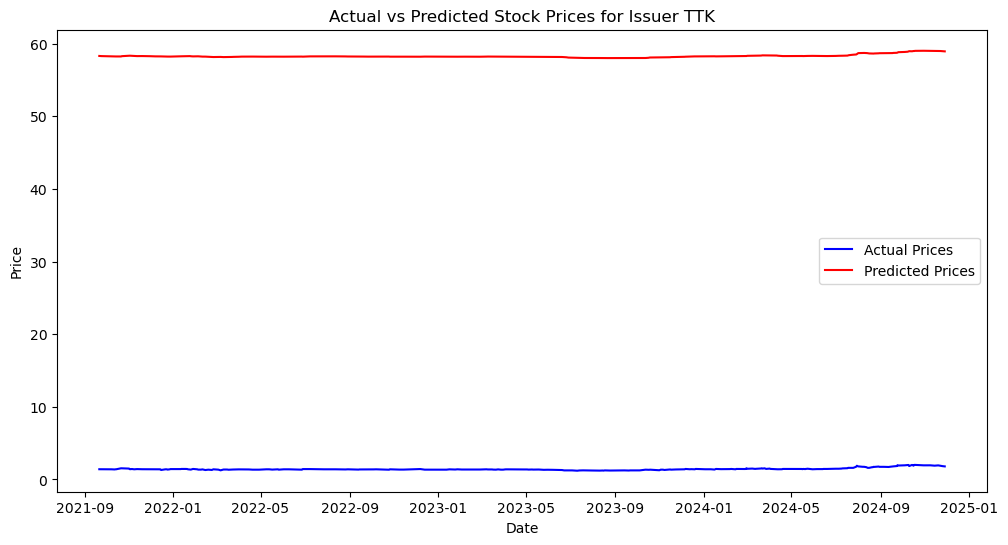

Mean Squared Error for Issuer TTK: 3231.0991432293513
Недоволно податоци за издавач TTKO, прескокнување на обработката.
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0635 - val_loss: 1.5946e-06
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0129 - val_loss: 8.2417e-05
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124 - val_loss: 2.9400e-06
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0155 - val_loss: 6.0748e-05
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - val_loss: 3.2584e-05
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - val_loss: 4.5720e-06
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0164 - val_loss: 5.5151e-05
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - val_loss: 3.4107e-06
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0172 - val_loss: 6.4078e-05
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - val_loss: 

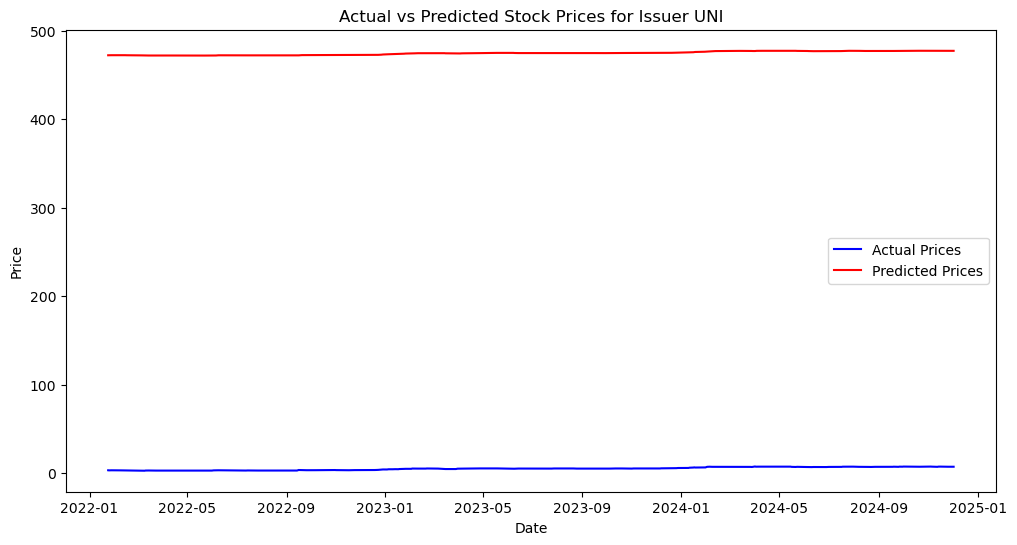

Mean Squared Error for Issuer UNI: 220436.40615399936
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.3868 - val_loss: 1.0779
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0719 - val_loss: 0.1005
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0477 - val_loss: 0.1973
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - val_loss: 0.3988
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0168 - val_loss: 0.3252
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0137 - val_loss: 0.2025
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0139 - val_loss: 0.2441
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - val_loss: 0.3000
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0144 - val_loss: 0.2456
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - val_loss: 0.2227
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - val_loss: 0.2622
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━

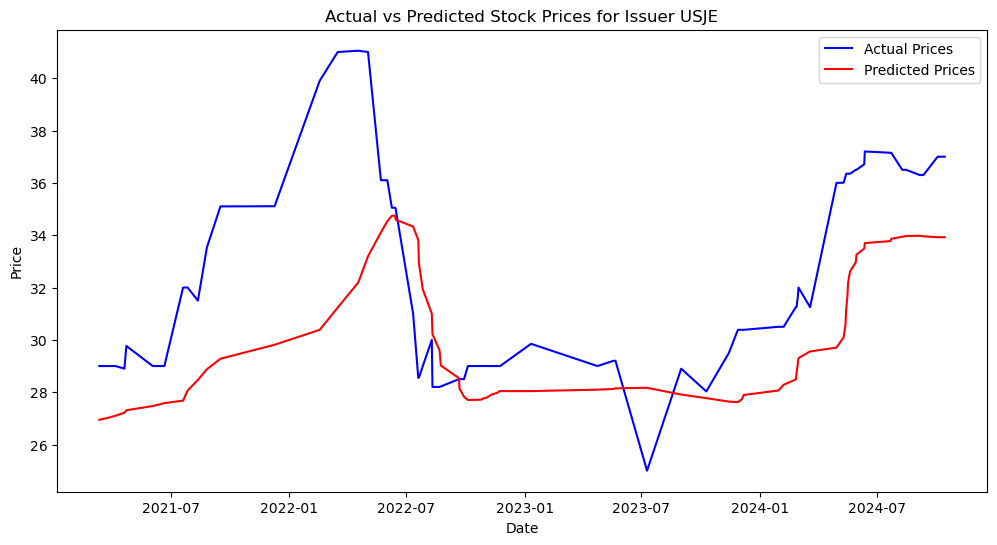

Mean Squared Error for Issuer USJE: 11.640660605934748
Недоволно податоци за издавач VARG, прескокнување на обработката.
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.2756 - val_loss: 1.4177
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0528 - val_loss: 0.1302
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0590 - val_loss: 0.4082
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0193 - val_loss: 0.6963
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0206 - val_loss: 0.5480
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0179 - val_loss: 0.4012
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0185 - val_loss: 0.4917
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0157 - val_loss: 0.4996
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0162 - val_loss: 0.5171
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0162 - val_loss: 0.5191
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/ste

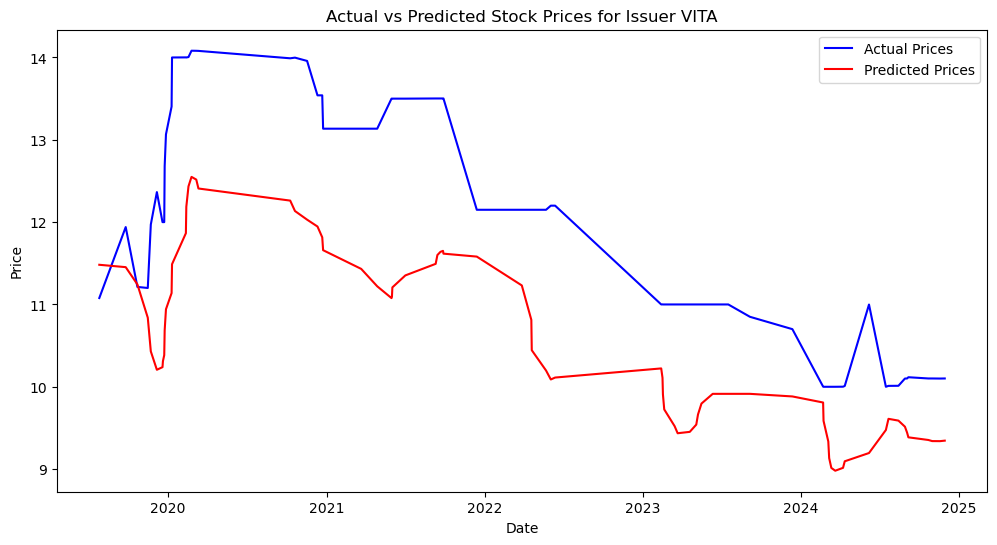

Mean Squared Error for Issuer VITA: 2.2062631613599883
Недоволно податоци за X_test за издавач VROS. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.0470 - val_loss: 0.1904
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.9919 - val_loss: 0.1641
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.8690 - val_loss: 0.1396
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.7311 - val_loss: 0.1167
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.6439 - val_loss: 0.0953
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.5287 - val_loss: 0.0753
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.3930 - val_loss: 0.0568
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.3454 - val_loss: 0.0402
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2847 - val_loss: 0.0258
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1525 - val_loss: 0.0141
Epoch 11/50
1/1 ━━━━━━

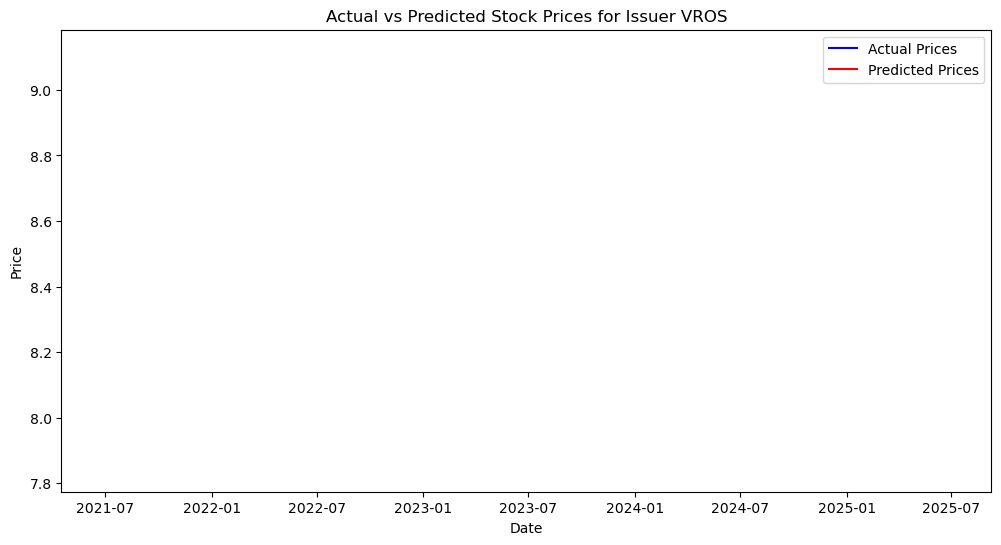

Mean Squared Error for Issuer VROS: 1.6419518056744378
Премалку податоци за издавач VSC. Намалување на look_back.
Недоволно податоци за X_test за издавач VSC. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.9607 - val_loss: 0.9603
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.0070 - val_loss: 0.9365
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.8833 - val_loss: 0.9111
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.8548 - val_loss: 0.8840
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.8060 - val_loss: 0.8568
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.7903 - val_loss: 0.8287
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.8429 - val_loss: 0.8005
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.6554 - val_loss: 0.7718
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.7192 - val_loss: 0.7426
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/ste

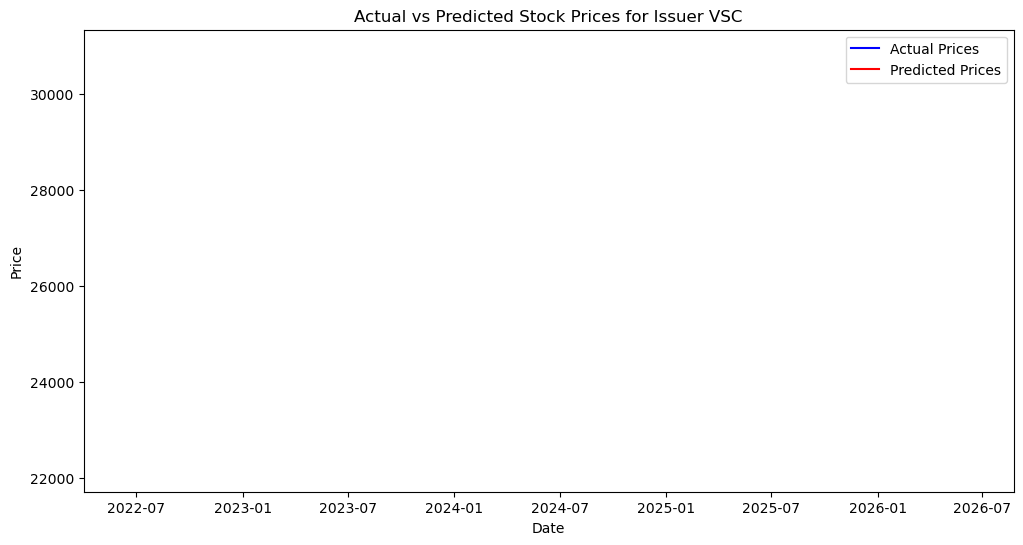

Mean Squared Error for Issuer VSC: 76692779.98390192
Премалку податоци за издавач VTKS. Намалување на look_back.
Недоволно податоци за X_test за издавач VTKS. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.9406 - val_loss: 36.5528
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.9388 - val_loss: 36.8801
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.7640 - val_loss: 37.2129
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.7091 - val_loss: 37.5485
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.5924 - val_loss: 37.8987
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.5491 - val_loss: 38.2607
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.4234 - val_loss: 38.6399
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.3038 - val_loss: 39.0370
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.3362 - val_loss: 39.4533
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11

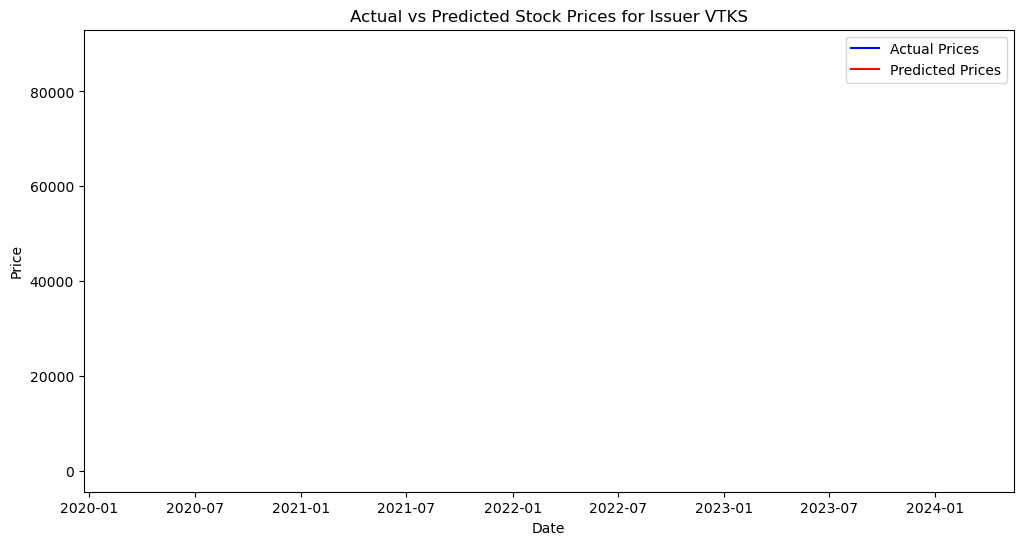

Mean Squared Error for Issuer VTKS: 7848752517.037409
Недоволно податоци за издавач ZAS, прескокнување на обработката.
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - loss: 0.4632 - val_loss: 0.1394
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3124 - val_loss: 0.0693
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1815 - val_loss: 0.0255
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0932 - val_loss: 0.0330
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0384 - val_loss: 0.1129
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0610 - val_loss: 0.1267
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0556 - val_loss: 0.0757
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0413 - val_loss: 0.0409
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0355 - val_loss: 0.0284
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0406 - val_loss: 0.0268
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

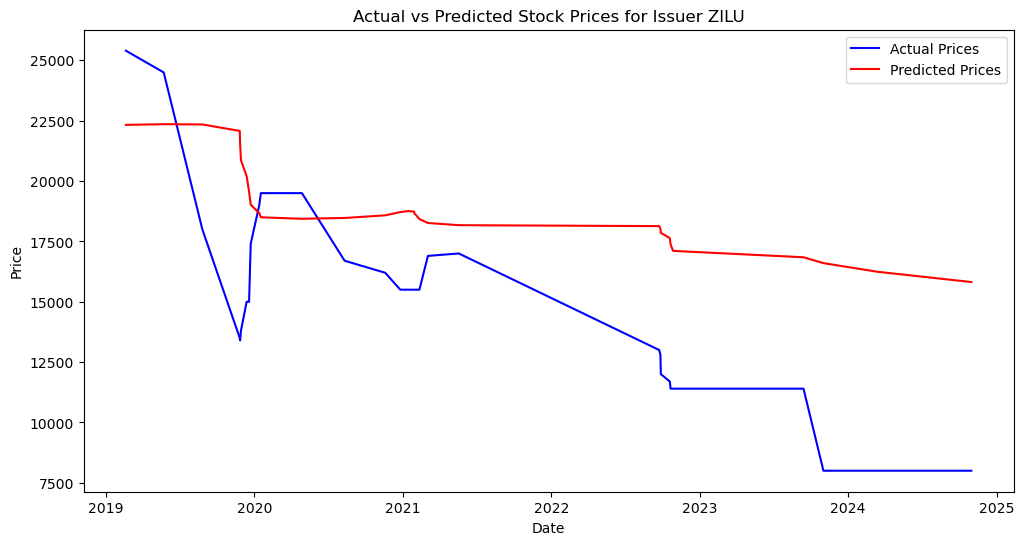

Mean Squared Error for Issuer ZILU: 24083269.0079121
Недоволно податоци за издавач ZIMS, прескокнување на обработката.
Недоволно податоци за издавач ZKAR, прескокнување на обработката.
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.3262 - val_loss: 0.5239
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0689 - val_loss: 0.0507
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0748 - val_loss: 0.1357
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0340 - val_loss: 0.2338
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0425 - val_loss: 0.1047
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0282 - val_loss: 0.0763
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0324 - val_loss: 0.1278
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0327 - val_loss: 0.1172
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0381 - val_loss: 0.0872
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0308 - v

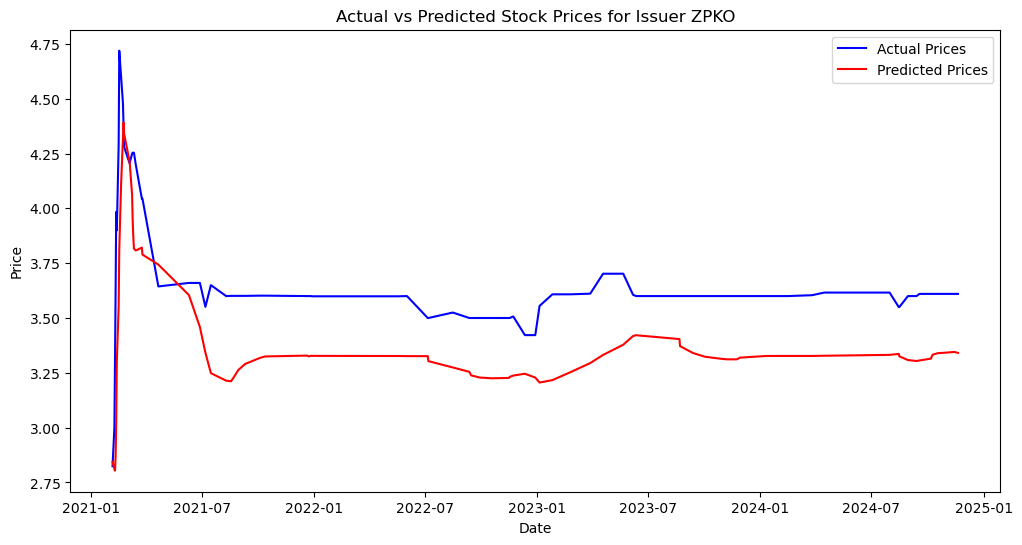

Mean Squared Error for Issuer ZPKO: 0.1114606367404391
Недоволно податоци за X_test за издавач ZPOG. Намалување на look_back за тест сетот.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1240 - val_loss: 10.5249
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1198 - val_loss: 10.2724
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.1166 - val_loss: 10.0249
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1140 - val_loss: 9.7904
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1109 - val_loss: 9.5610
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1082 - val_loss: 9.3353
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1068 - val_loss: 9.1076
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1013 - val_loss: 8.8782
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0986 - val_loss: 8.6421
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.1004 - val_loss: 8.4068
Epoch 11/50
1/1 ━━━━━━━━

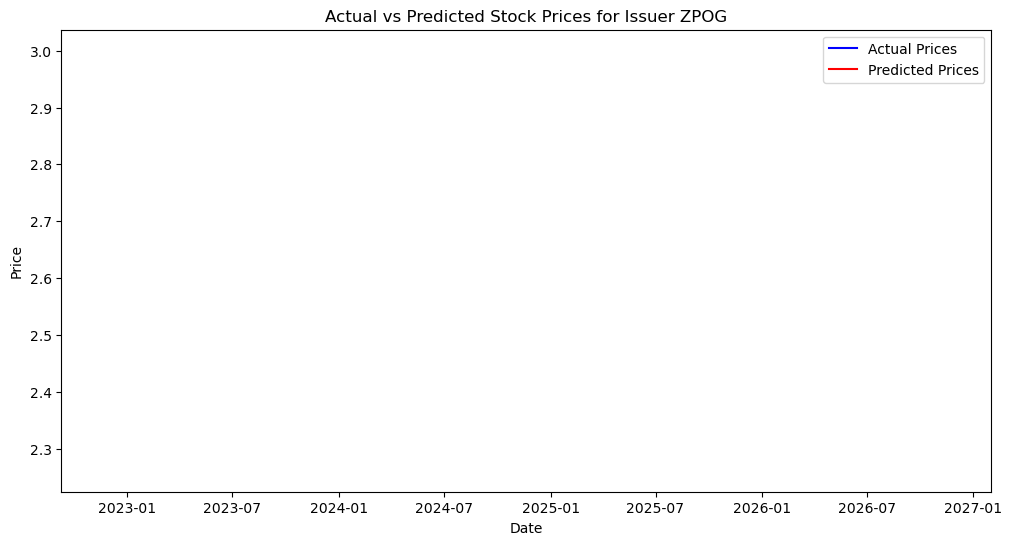

Mean Squared Error for Issuer ZPOG: 0.5462691319804094
Недоволно податоци за издавач ZUAS, прескокнување на обработката.


In [6]:
for issuer in unique_issuers:
    issuer_data = data[data['Код на издавач'] == issuer].sort_values('Датум')
    
    prices = issuer_data['Цена на последна трансакција'].values
    volumes = issuer_data['Количина'].values
    
    if len(prices) <= 10:
        print(f"Недоволно податоци за издавач {issuer}, прескокнување на обработката.")
        continue
    
    train_size = int(len(prices) * 0.7)
    train_prices, test_prices = prices[:train_size], prices[train_size:]
    train_volumes, test_volumes = volumes[:train_size], volumes[train_size:]
    

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train_prices = scaler.fit_transform(train_prices.reshape(-1, 1))
    
    def prepare_data(series, look_back=10):
        X, y = [], []
        for i in range(len(series) - look_back):
            X.append(series[i:i+look_back])
            y.append(series[i+look_back])
        return np.array(X), np.array(y)

    look_back = 10
    if len(scaled_train_prices) <= look_back:
        print(f"Премалку податоци за издавач {issuer}. Намалување на look_back.")
        look_back = len(scaled_train_prices) - 1  

    X_train, y_train = prepare_data(scaled_train_prices, look_back)
    scaled_test_prices = scaler.transform(test_prices.reshape(-1, 1))
    X_test, y_test = prepare_data(scaled_test_prices, look_back)

    if X_train.shape[0] > 0 and X_train.shape[1] > 0:
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    else:
        raise ValueError("Неуспешно креирани податоци за X_train.")

    if X_test.shape[0] > 0 and X_test.shape[1] > 0:
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        print(f"Недоволно податоци за X_test за издавач {issuer}. Намалување на look_back за тест сетот.")
        look_back = min(len(scaled_test_prices) - 1, look_back)  
        X_test, y_test = prepare_data(scaled_test_prices, look_back)
        if X_test.shape[0] > 0 and X_test.shape[1] > 0:
            X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        else:
            print(f"Премалку податоци за X_test и за издавач {issuer}. Прескокнување на обработката.")
            continue

    model = Sequential()
    model.add(Input(shape=(look_back, 1)))  
    model.add(LSTM(50, return_sequences=True))  
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))  

    model.compile(optimizer='adam', loss='mean_squared_error')

    
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    predicted_prices = model.predict(X_test)

    predicted_prices = scaler.inverse_transform(predicted_prices)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(issuer_data['Датум'].iloc[train_size + look_back:].values, y_test_actual, color='blue', label='Actual Prices')
    plt.plot(issuer_data['Датум'].iloc[train_size + look_back:].values, predicted_prices, color='red', label='Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Stock Prices for Issuer {issuer}')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test_actual, predicted_prices)
    print(f"Mean Squared Error for Issuer {issuer}: {mse}")
